In [1]:
import pandas as pd

# Charger les données
file_path = "/content/uci-secom.csv"
df = pd.read_csv(file_path)

In [2]:
import pandas as pd

# Charger les données
file_path = "/content/uci-secom.csv"
df = pd.read_csv(file_path)

# 1. Afficher les dimensions du dataframe
print("Dimensions du dataframe:", df.shape)

# 2. Afficher les 10 premières lignes
print("\nPremières lignes du dataframe:")
print(df.head(10))

# 3. Utiliser la méthode info() pour afficher les détails des colonnes
print("\nInformations sur le dataframe:")
print(df.info())

# 4. Utiliser la méthode describe() pour afficher les statistiques
print("\nStatistiques descriptives du dataframe:")
print(df.describe())

Dimensions du dataframe: (1567, 593)

Premières lignes du dataframe:
                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   
5  2008-07-19 17:53:00  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0   
6  2008-07-19 19:44:00  3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0   
7  2008-07-19 19:45:00  3058.88  2690.15  2248.9000  1004.4692  0.7884  100.0   
8  2008-07-19 20:24:00  2967.68  2600.47  2248.9000  1004.4692  0.7884  100.0   
9  2008-07-19 21:35:00  3016.11  2428.37  2248.9000  1004.4692  0.7884  100.0   

          6       7       8  ...     58

In [3]:
#Partie 2 Analyse des donnée :

# 1. Vérifier les types de données des colonnes
print("\nTypes des données des colonnes:")
print(df.dtypes)


Types des données des colonnes:
Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
587          float64
588          float64
589          float64
Phase         object
Pass/Fail      int64
Length: 593, dtype: object


In [4]:

# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = df.isnull().mean() * 100

# Identifier les colonnes avec plus de 40% de valeurs manquantes
columns_to_drop = missing_percentage[missing_percentage > 40].index

# Supprimer les colonnes sélectionnées
df_cleaned = df.drop(columns=columns_to_drop)

# Enregistrer le nouveau dataframe
df_cleaned.to_csv("uci-secom-cleaned.csv", index=False)

# Afficher les dimensions du dataframe nettoyé
print("Dimensions du dataframe nettoyé :", df_cleaned.shape)

# Afficher le nombre de colonnes restantes
print("Nombre de colonnes restantes :", df_cleaned.shape[1])


Dimensions du dataframe nettoyé : (1567, 561)
Nombre de colonnes restantes : 561


In [5]:

import pandas as pd

# Charger les données
file_path = "/content/uci-secom.csv"
df = pd.read_csv(file_path)

# Calculer le nombre de valeurs uniques pour chaque colonne
n_unique = df.nunique()

# Identifier les colonnes avec seulement une ou deux valeurs uniques (à l'exception de la dernière colonne)
columns_to_drop = n_unique[(n_unique <= 2) & (df.columns != 'Pass/Fail')].index

# Supprimer les colonnes sélectionnées
df_cleaned = df.drop(columns=columns_to_drop)

# Enregistrer le nouveau dataframe
df_cleaned.to_csv("uci-secom-cleaned.csv", index=False)

# Afficher les dimensions du dataframe nettoyé
print("Dimensions du dataframe nettoyé :", df_cleaned.shape)

# Afficher le nombre de colonnes restantes
print("Nombre de colonnes restantes :", df_cleaned.shape[1])

# Enregistrer le nouveau dataframe
df_cleaned.to_csv("uci-secom-cleaned2.csv", index=False)


Dimensions du dataframe nettoyé : (1567, 471)
Nombre de colonnes restantes : 471


In [6]:

import pandas as pd

# Charger les données
file_path = "/content/uci-secom-cleaned2.csv"
df = pd.read_csv(file_path)

# Supprimer les colonnes entièrement vides
df.dropna(axis=1, how='all', inplace=True)

# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = df.isnull().mean() * 100

# Identifier les colonnes avec plus de 50% de valeurs manquantes
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Supprimer les colonnes sélectionnées
df_cleaned = df.drop(columns=columns_to_drop)

# Enregistrer le nouveau dataframe
df_cleaned.to_csv("uci-secom-cleaned3.csv", index=False)

# Afficher les dimensions du dataframe nettoyé
print("Dimensions du dataframe nettoyé :", df_cleaned.shape)

# Afficher le nombre de colonnes restantes
print("Nombre de colonnes restantes :", df_cleaned.shape[1])


Dimensions du dataframe nettoyé : (1567, 443)
Nombre de colonnes restantes : 443


In [7]:

import pandas as pd

# Charger les données
file_path = "/content/uci-secom-cleaned3.csv"
df = pd.read_csv(file_path)

# Remplacer les valeurs manquantes par la médiane pour chaque colonne numérique
for column in df.select_dtypes(include=['number']):
  df[column].fillna(df[column].median(), inplace=True)

# Enregistrer le nouveau dataframe
df.to_csv("uci-secom-cleaned4.csv", index=False)

# Afficher les dimensions du dataframe nettoyé
print("Dimensions du dataframe nettoyé :", df.shape)

# Afficher le nombre de colonnes restantes
print("Nombre de colonnes restantes :", df.shape[1])


<ipython-input-7-45726f934fb1>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


Dimensions du dataframe nettoyé : (1567, 443)
Nombre de colonnes restantes : 443


In [8]:

import pandas as pd
# Charger les données
file_path = "/content/uci-secom-cleaned4.csv"
df = pd.read_csv(file_path)

# Encoder la colonne "Phase" avec Label Encoding (si elle existe)
from sklearn.preprocessing import LabelEncoder

if 'Phase' in df.columns:
  le = LabelEncoder()
  df['Phase'] = le.fit_transform(df['Phase'])

# Enregistrer le nouveau dataframe avec la colonne "Phase" encodée
df.to_csv("uci-secom-cleaned5.csv", index=False)

print("La colonne 'Phase' a été encodée avec succès.")


La colonne 'Phase' a été encodée avec succès.


In [9]:

import pandas as pd
# Charger les données
file_path = "/content/uci-secom-cleaned5.csv"
df = pd.read_csv(file_path)

 #Supprimer la première colonne
df = df.drop(df.columns[0], axis=1)

# Afficher les premières lignes pour vérifier
print("="*40)
print(" Suppression de la première colonne ")
print("="*40)
print(df_cleaned.head())
print("="*40)
# Séparer les variables indépendantes (X) de la variable dépendante (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Standardiser les données
x = StandardScaler().fit_transform(X)

# 2. Appliquer PCA
pca = PCA(n_components=0.95) # Conserver 95% de la variance expliquée
principalComponents = pca.fit_transform(x)

# Créer un nouveau dataframe avec les composantes principales
principalDf = pd.DataFrame(data = principalComponents)

# Concaténer les composantes principales avec la variable cible
finalDf = pd.concat([principalDf, y], axis = 1)

# Enregistrer le nouveau dataframe avec les composantes principales
finalDf.to_csv("uci-secom-pca.csv", index=False)

print("La réduction de dimension avec PCA a été effectuée avec succès.")
print("Le nouveau dataframe avec les composantes principales a été enregistré sous le nom 'uci-secom-pca.csv'.")


 Suppression de la première colonne 
                  Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

          6       7       8       9  ...     582     583     584      585  \
0   97.6133  0.1242  1.5005  0.0162  ...  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966 -0.0005  ...  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  0.0041  ...  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882 -0.0124  ...  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031 -0.0031  ...  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589                 Pha

In [10]:


import joblib

# Assuming 'pca' is the PCA object you want to save
joblib.dump(pca, 'pca_model.pkl')


['pca_model.pkl']

In [11]:

import pandas as pd
# Charger les données
file_path = "/content/uci-secom-pca.csv"
df = pd.read_csv(file_path)

# Afficher le nombre de colonnes du dataframe actuel
print("Nombre de colonnes dans le dataframe actuel :", df.shape[1])


Nombre de colonnes dans le dataframe actuel : 165


Features les plus corrélées avec la variable cible (Pass/Fail):
Pass/Fail    1.000000
1            0.130481
162          0.090169
122          0.077743
100          0.072280
9            0.071967
83           0.068868
8            0.063496
103          0.061145
69           0.055944
Name: Pass/Fail, dtype: float64
23    -0.041289
97    -0.041855
63    -0.042436
11    -0.046020
47    -0.047978
67    -0.049393
101   -0.053285
87    -0.056700
12    -0.079604
65    -0.092010
Name: Pass/Fail, dtype: float64


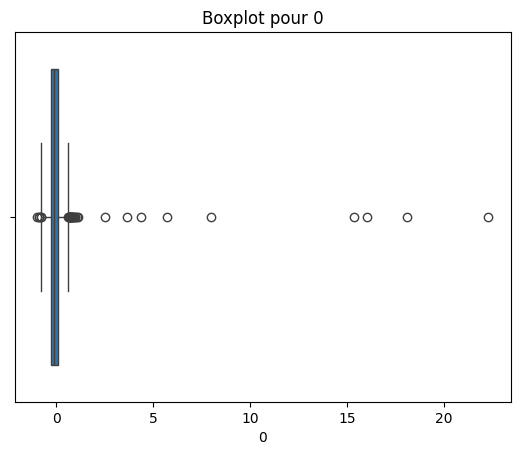

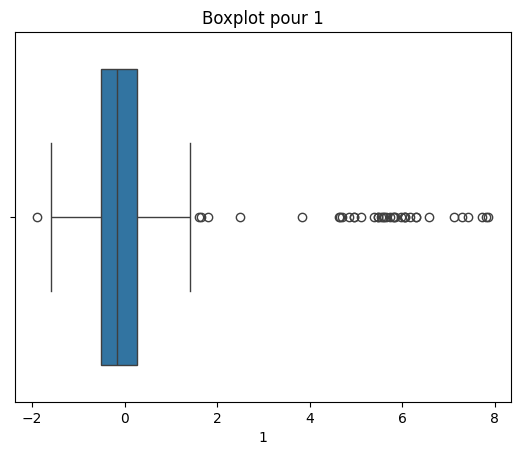

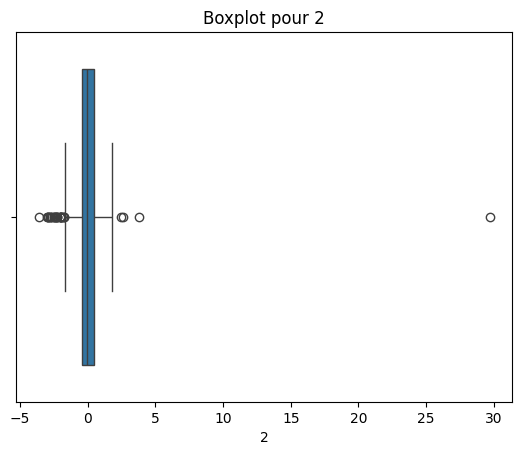

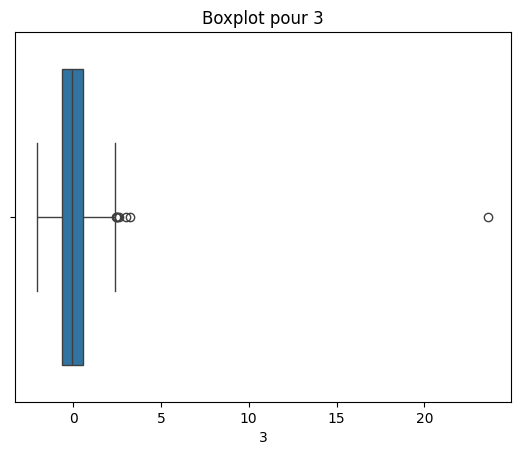

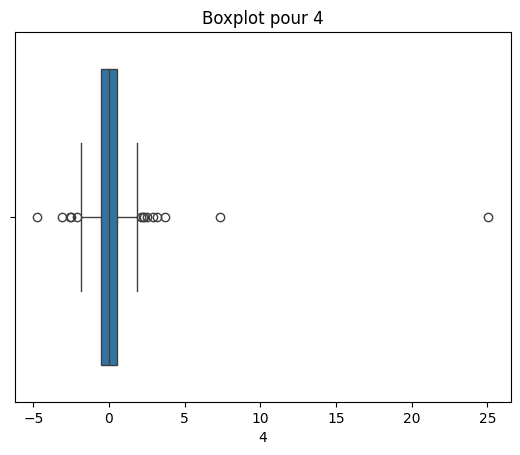

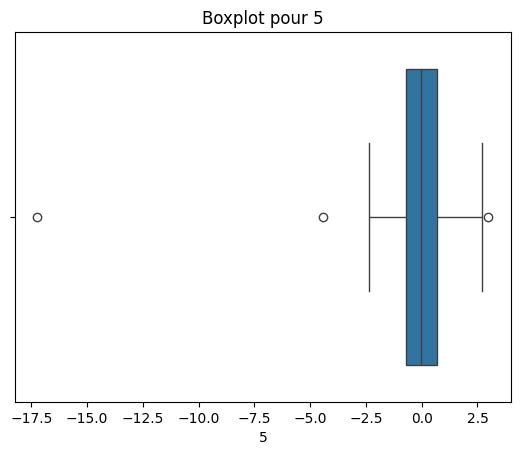

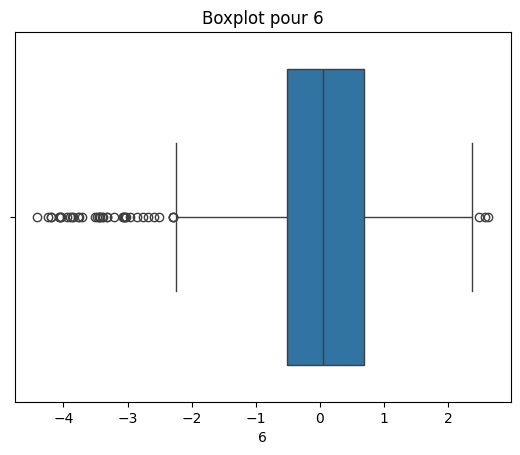

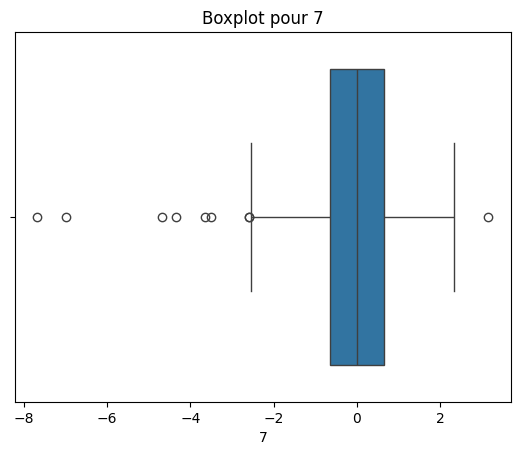

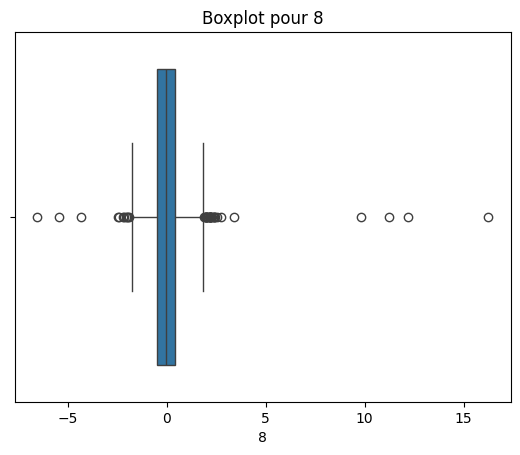

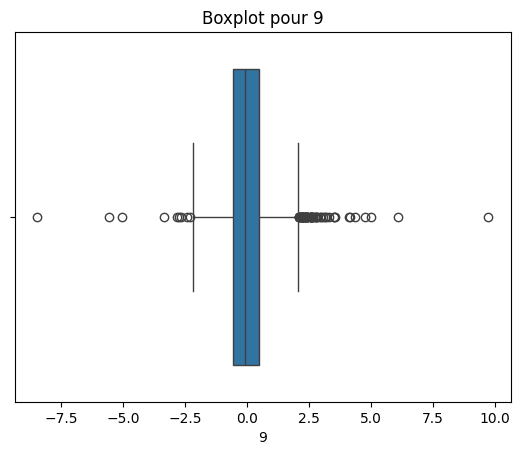

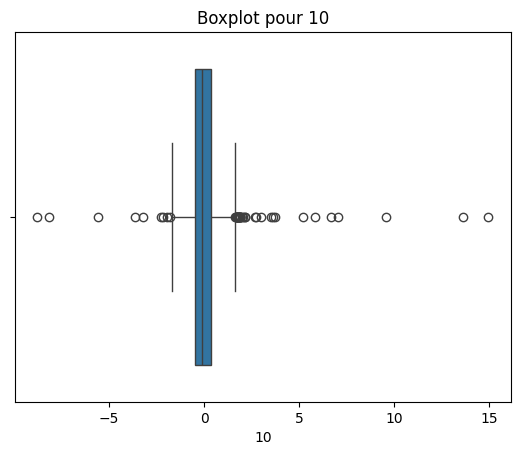

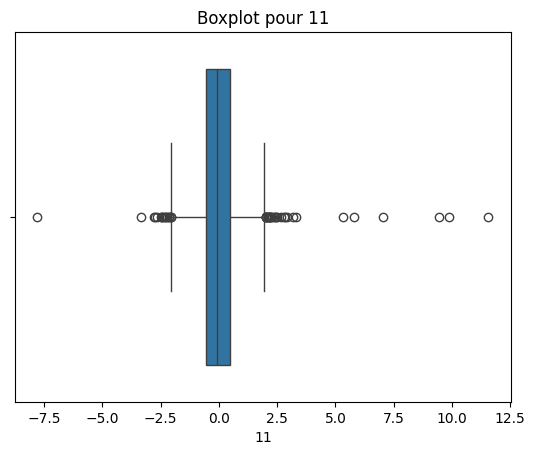

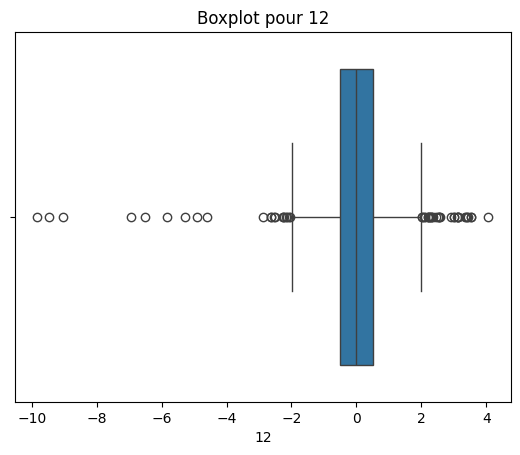

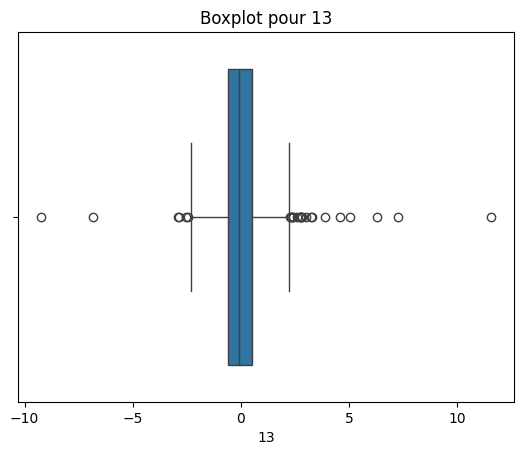

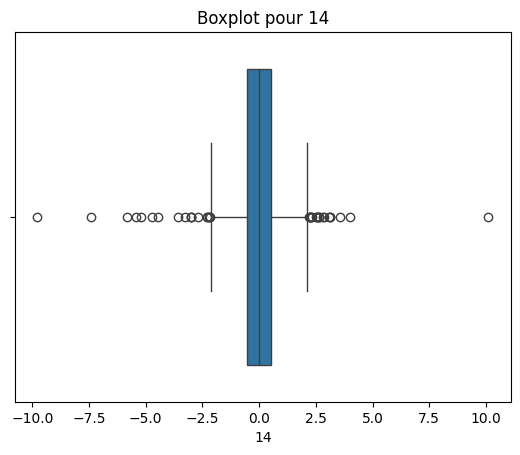

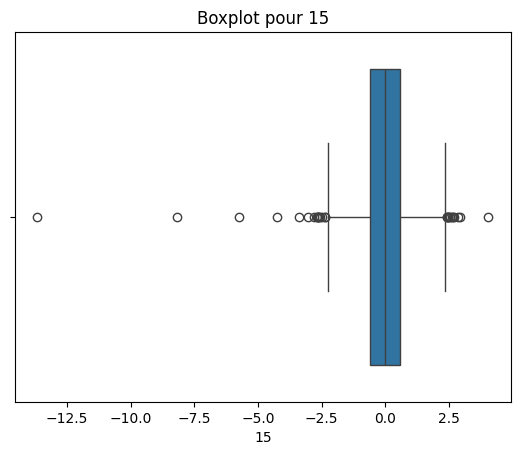

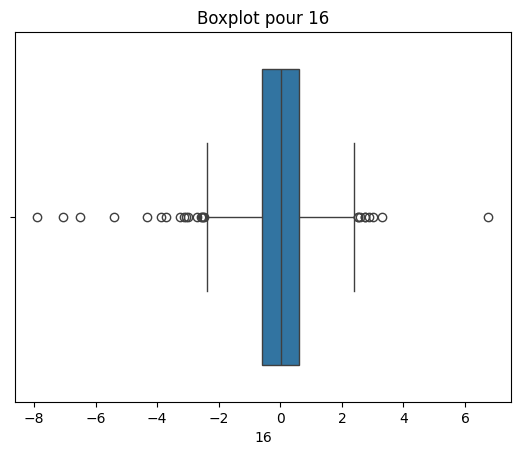

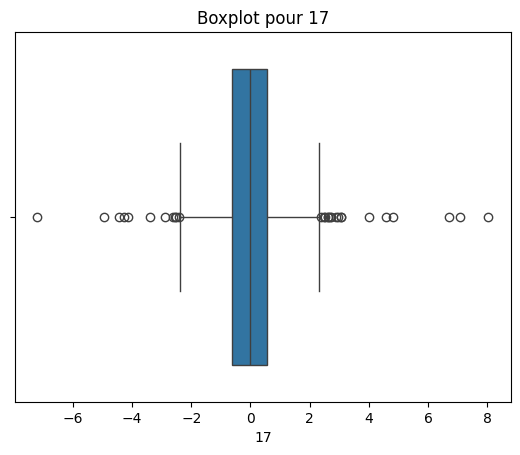

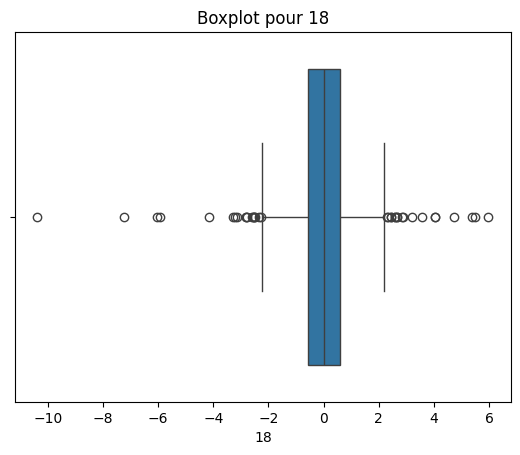

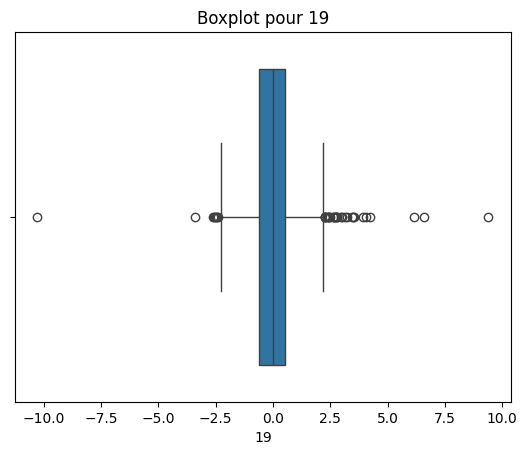

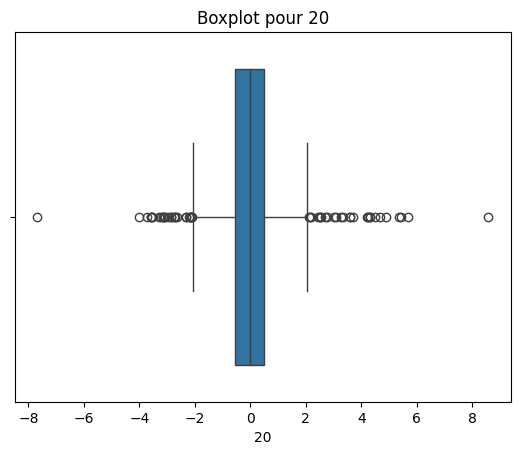

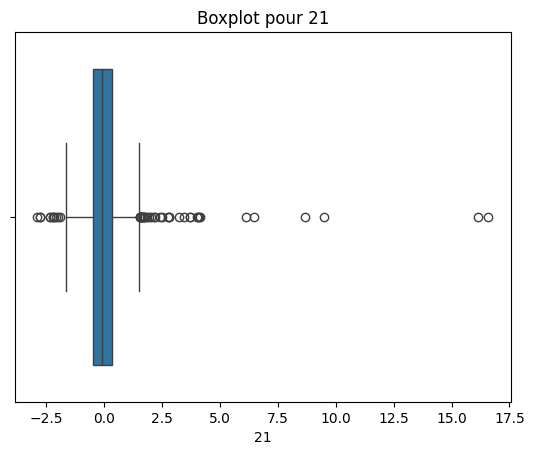

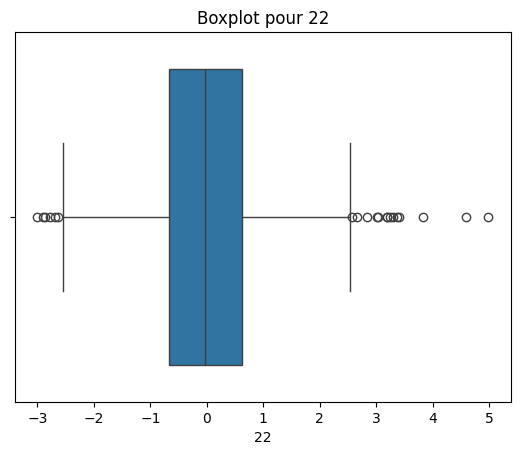

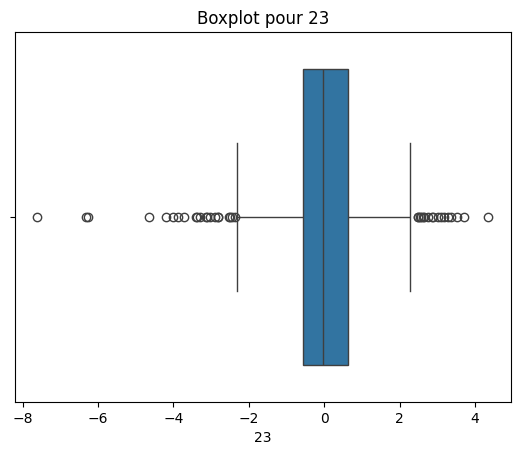

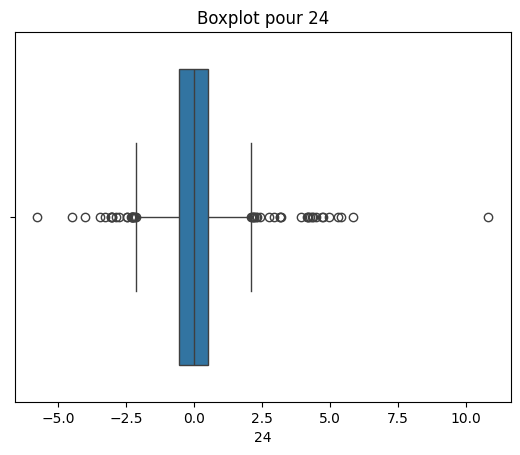

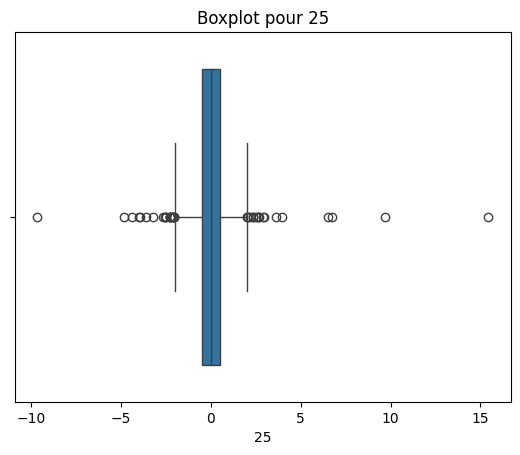

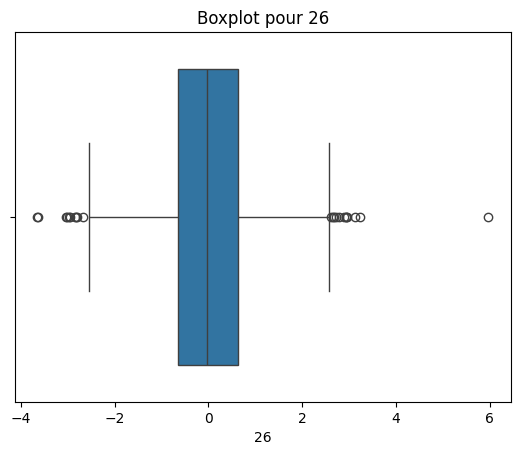

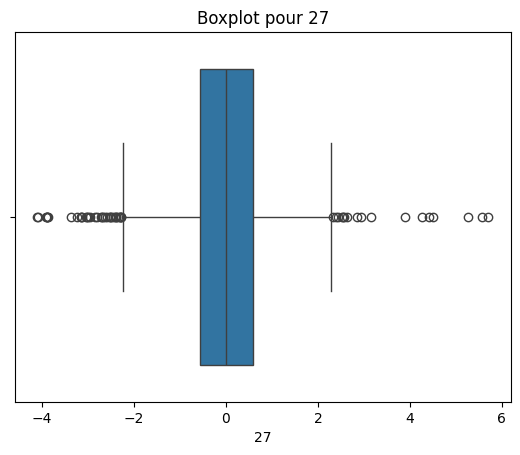

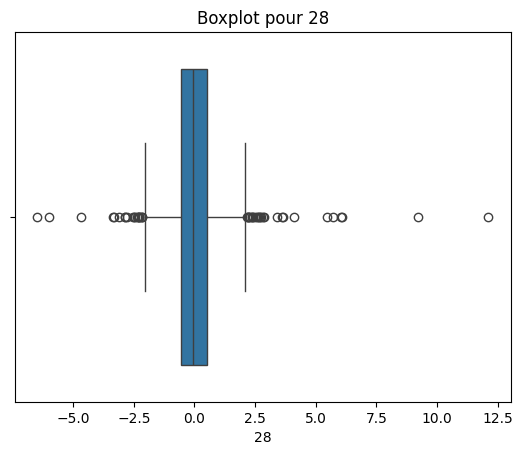

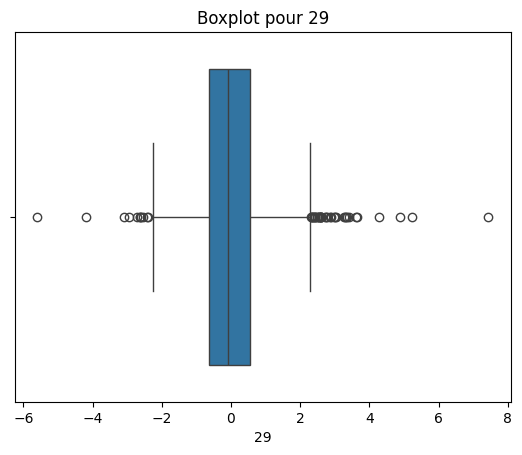

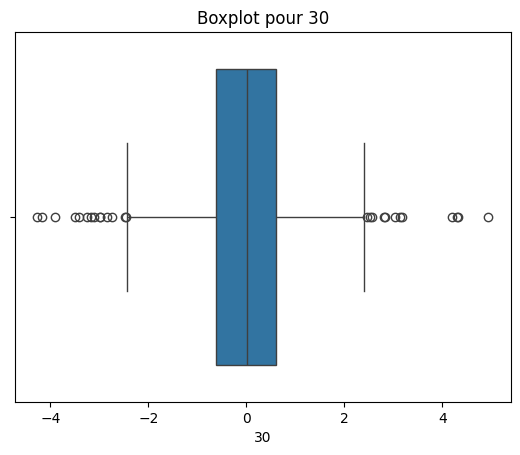

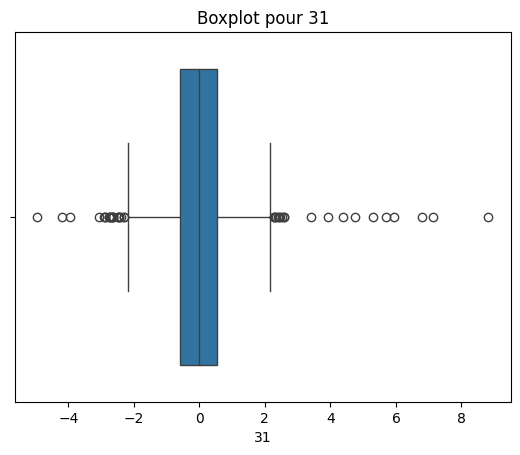

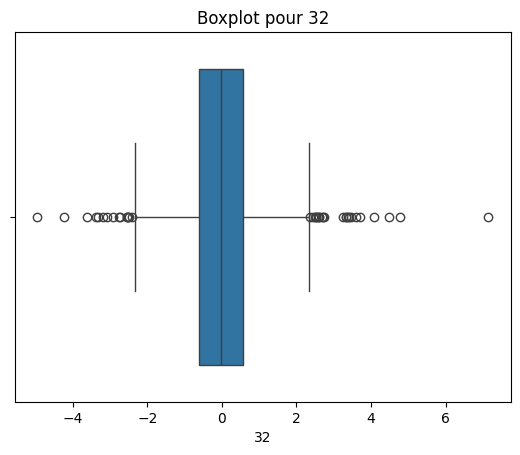

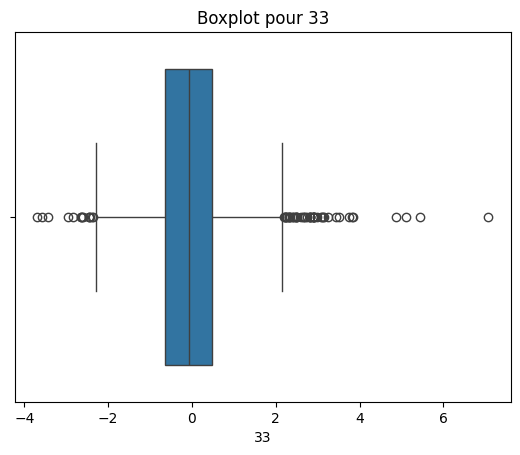

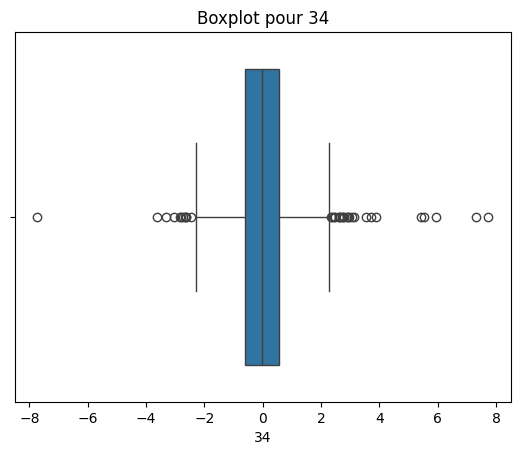

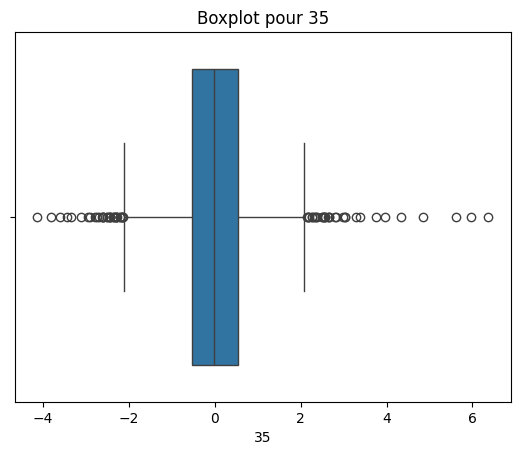

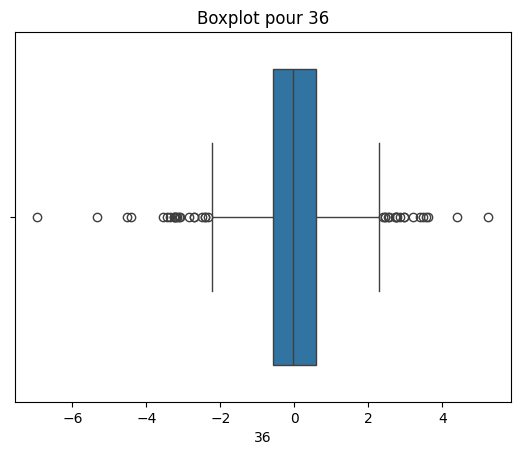

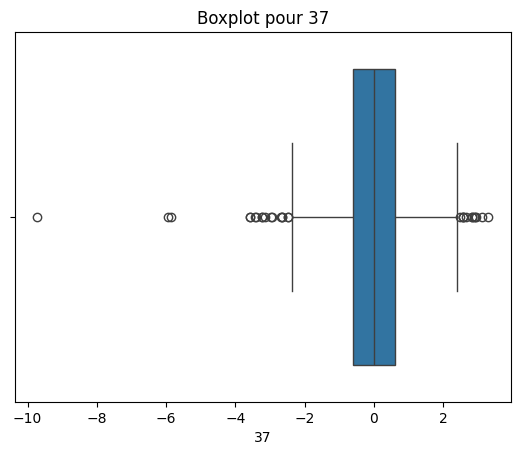

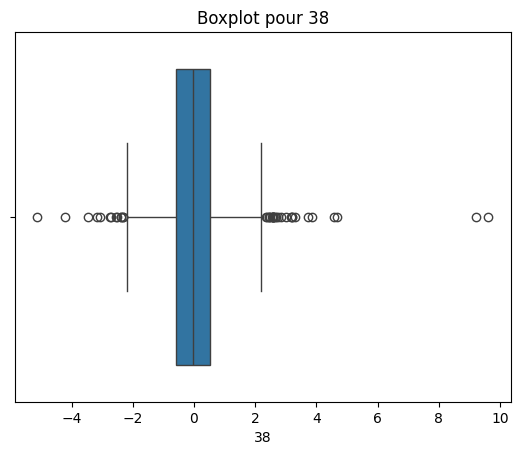

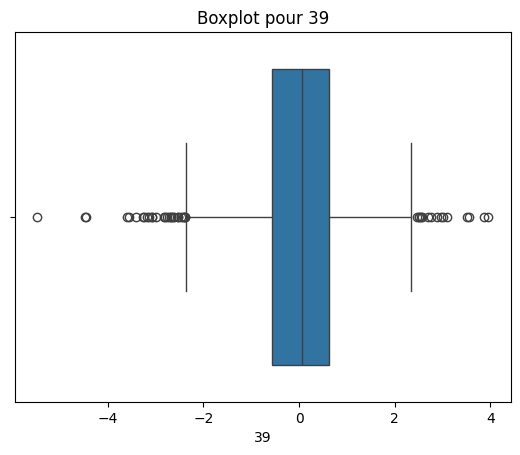

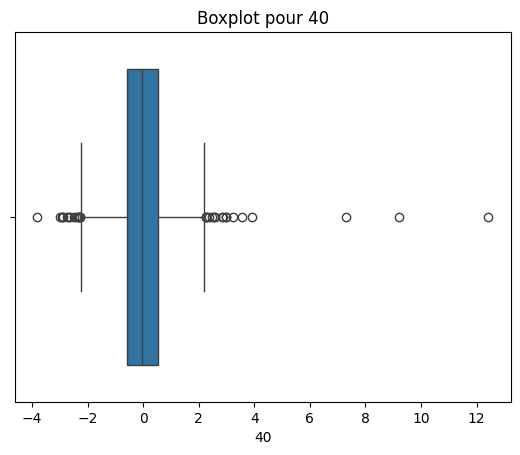

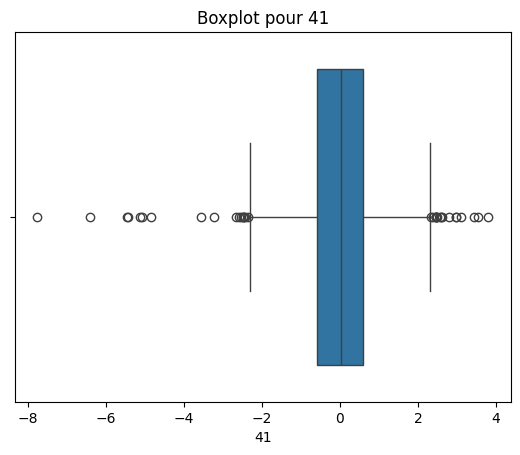

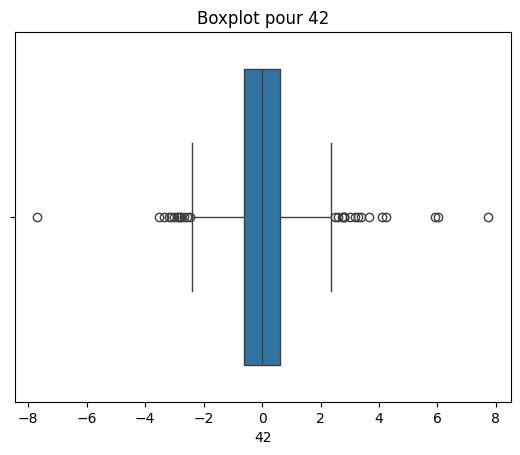

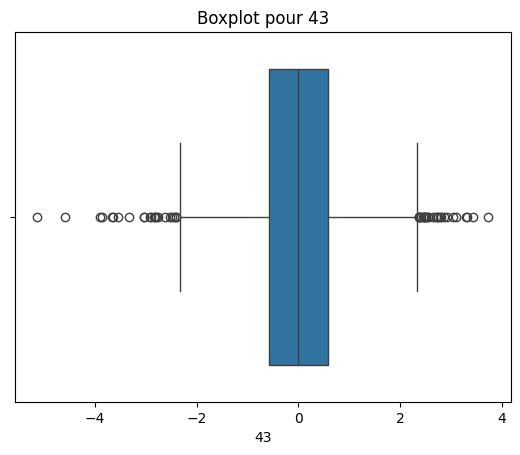

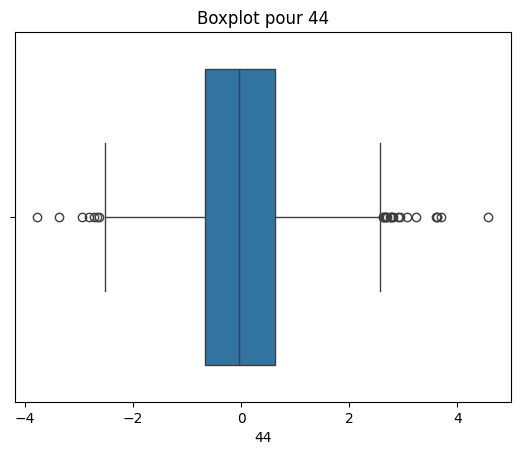

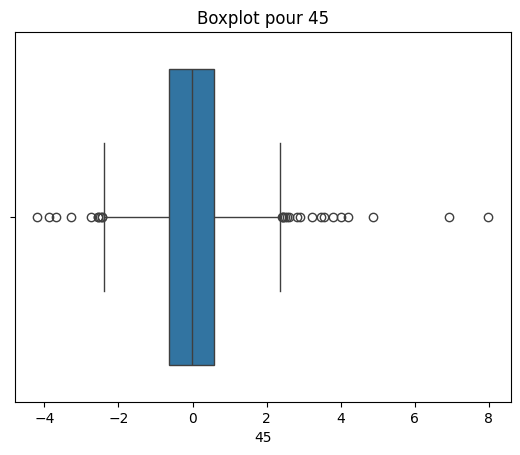

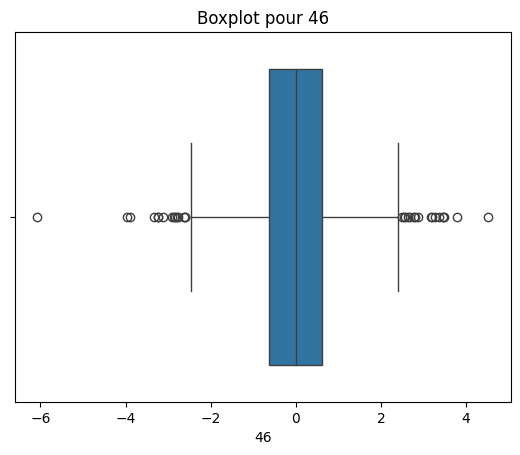

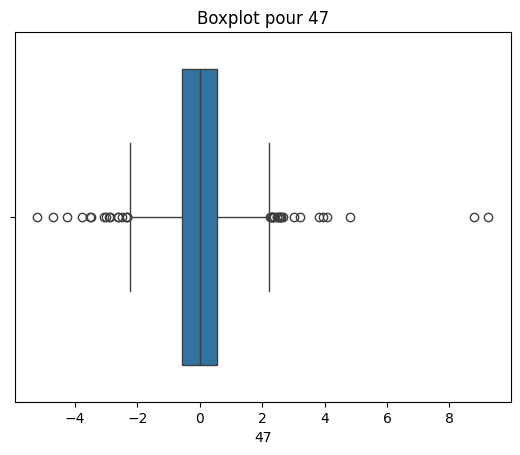

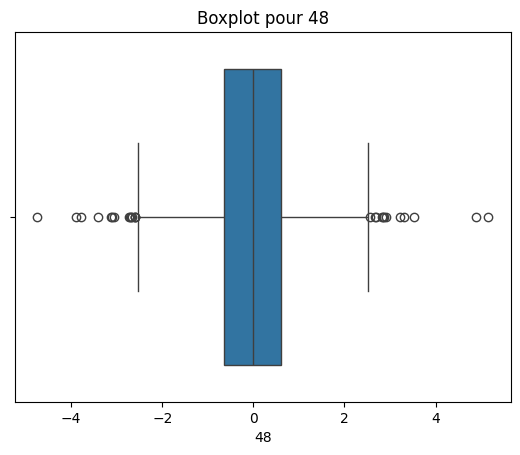

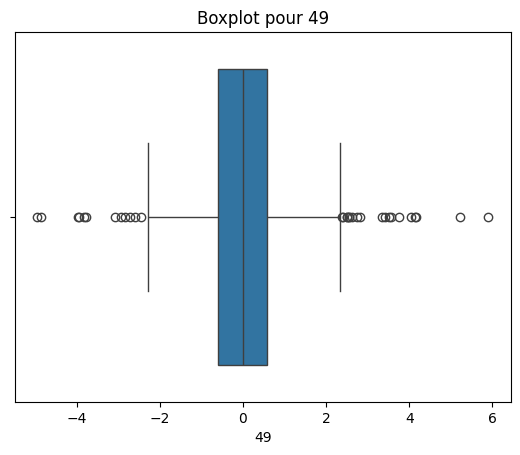

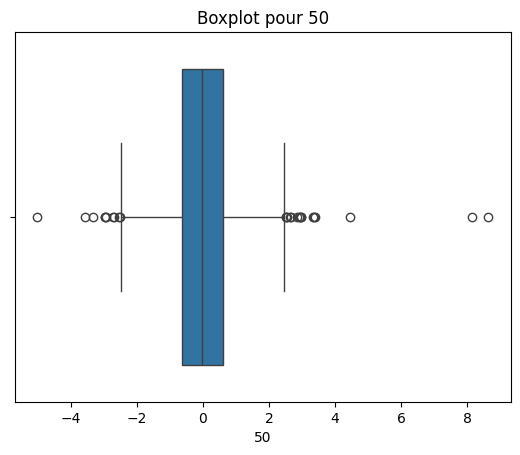

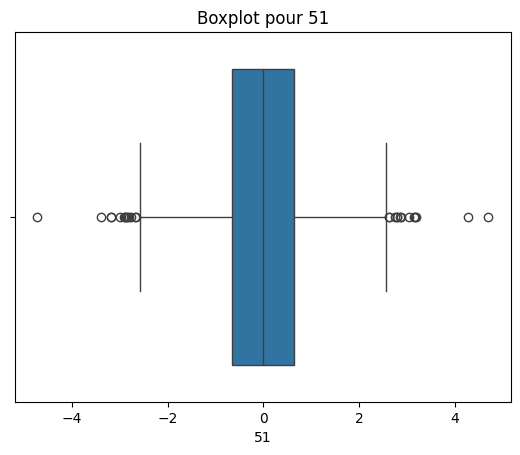

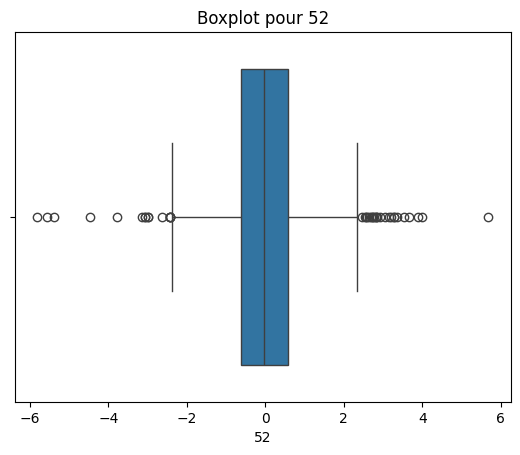

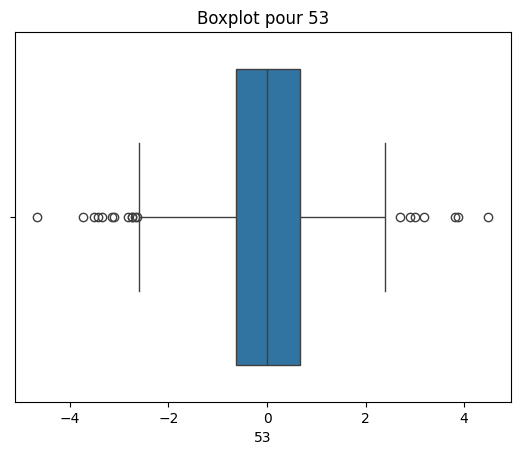

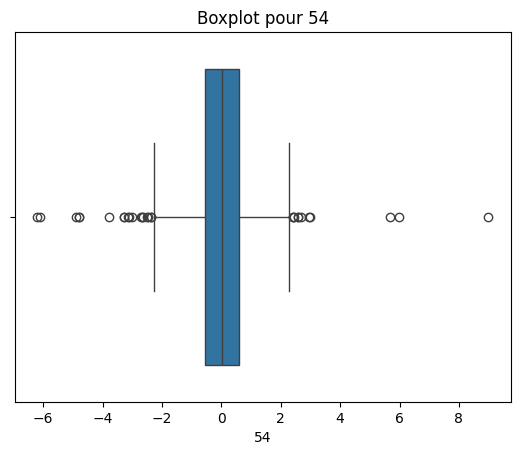

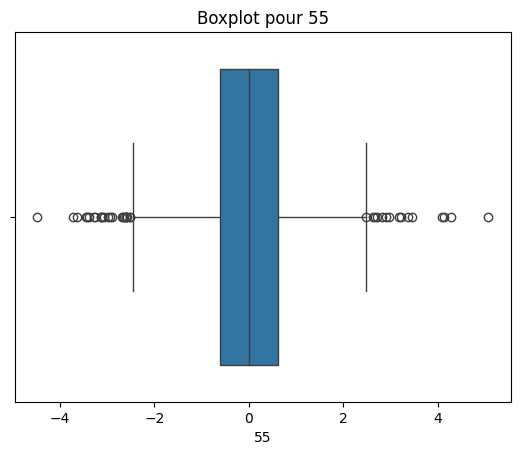

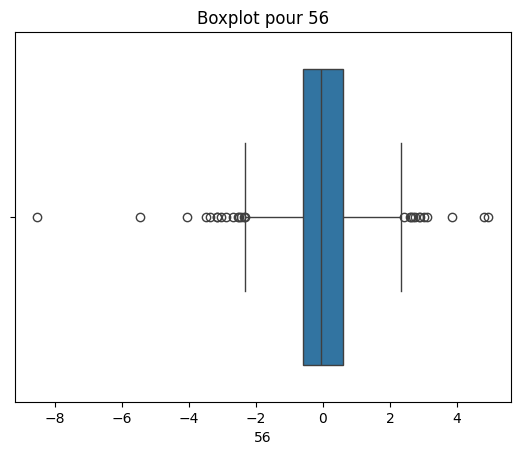

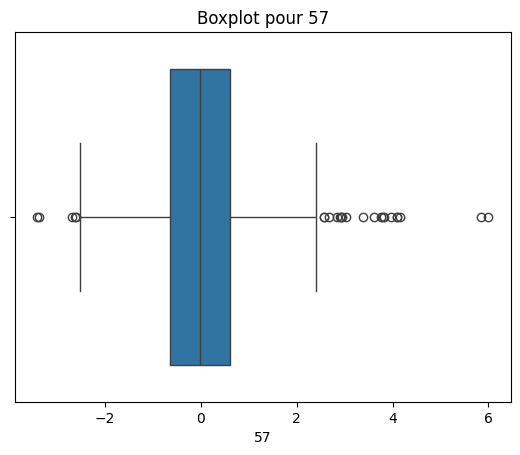

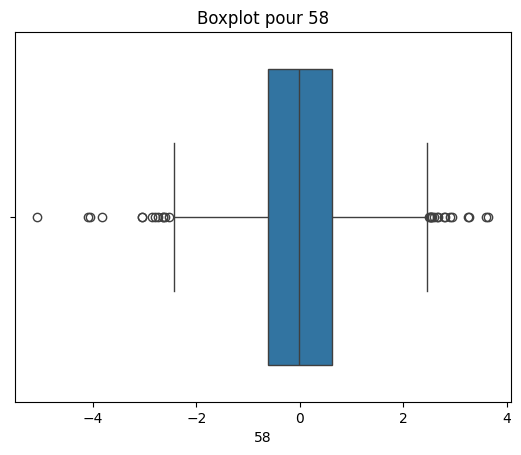

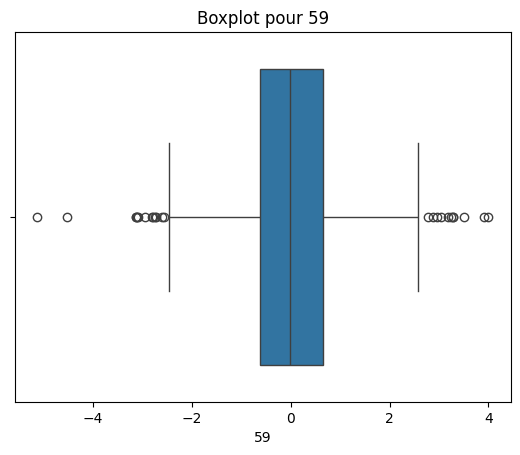

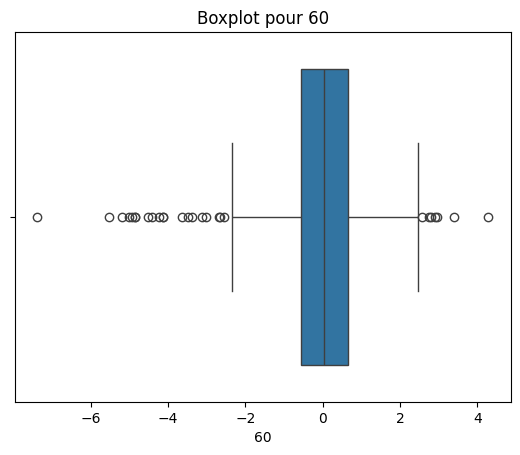

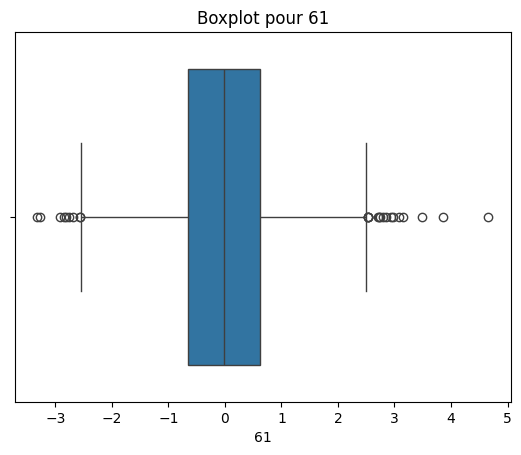

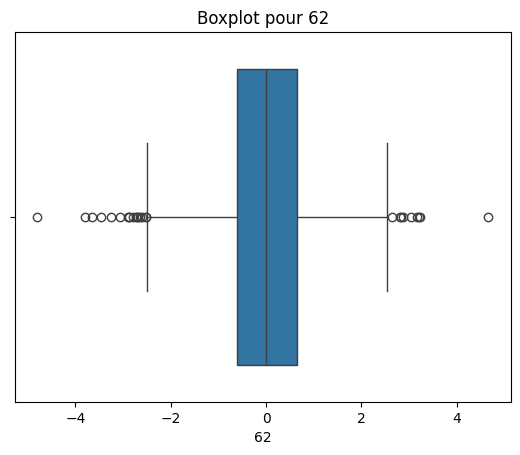

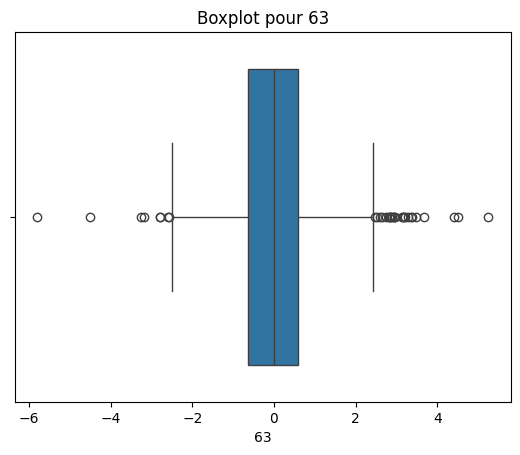

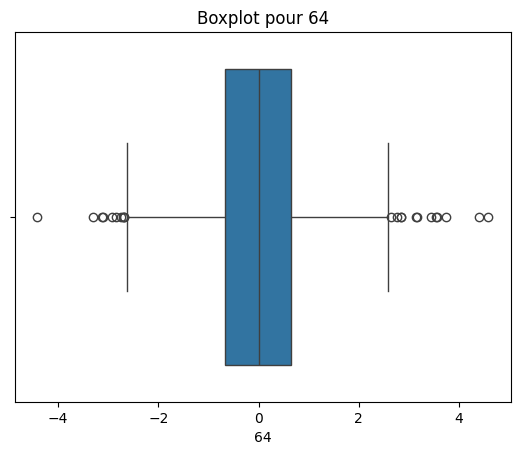

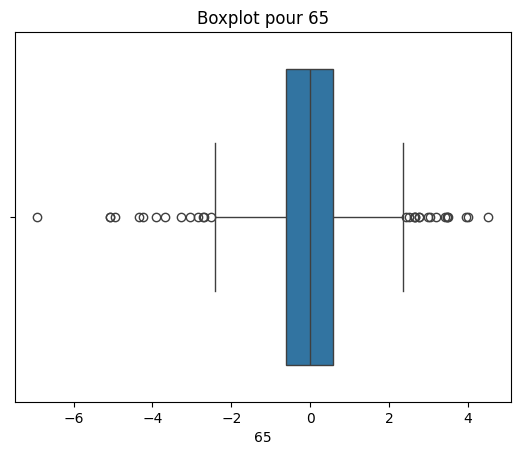

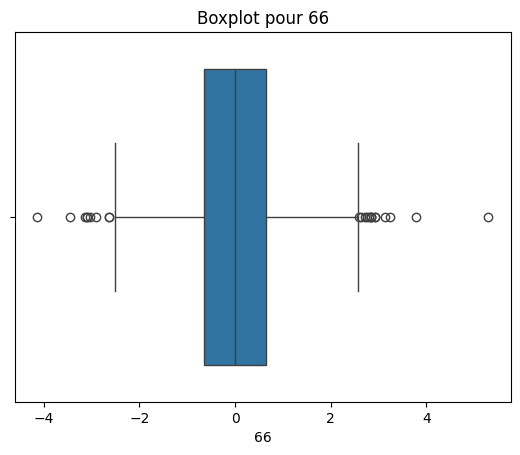

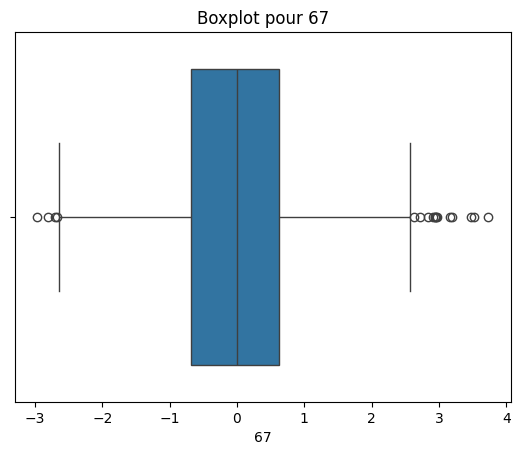

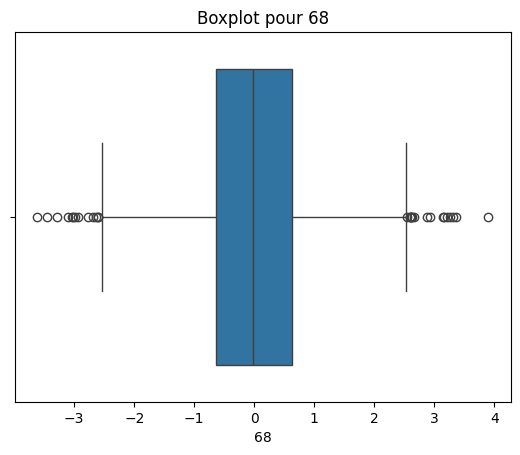

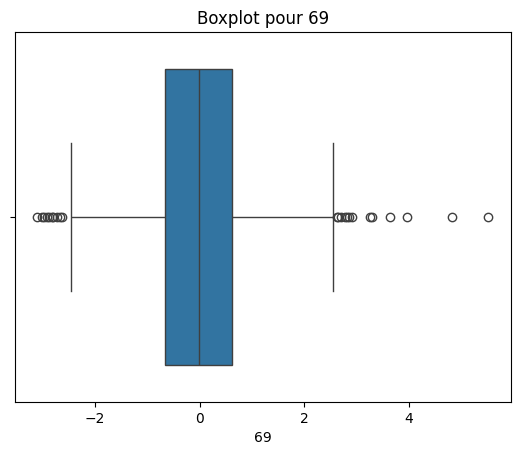

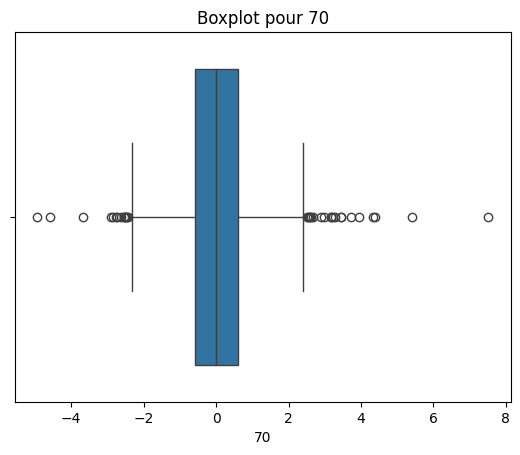

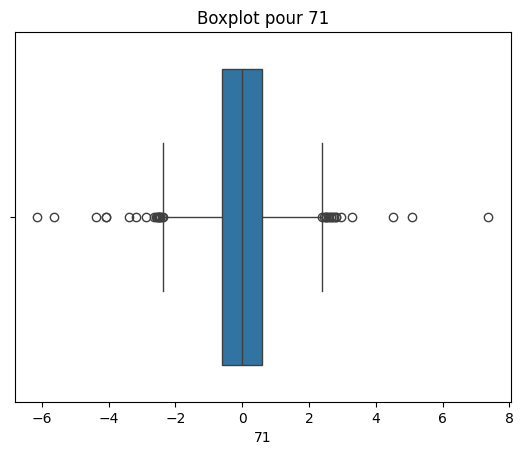

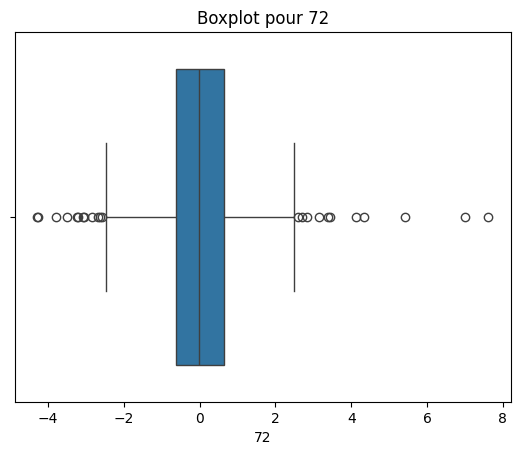

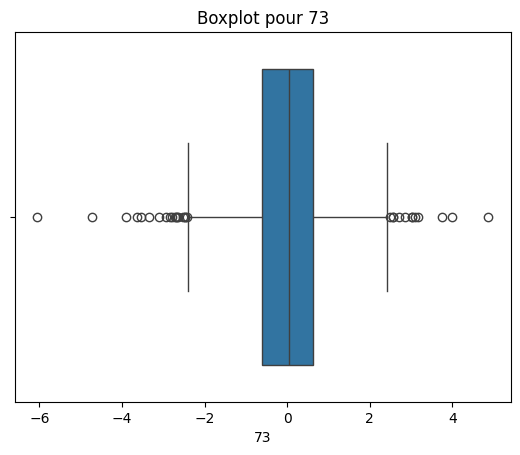

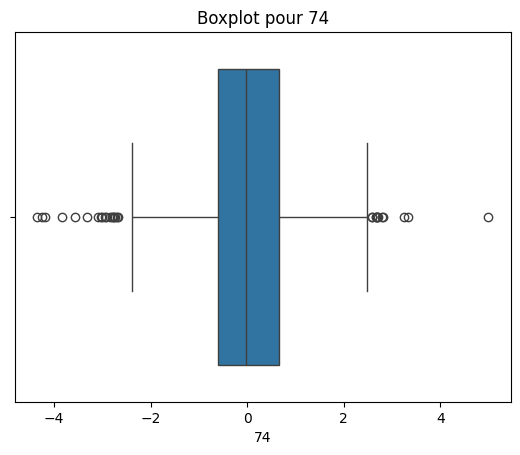

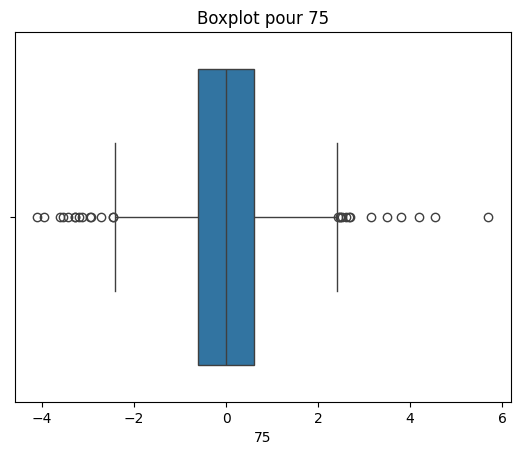

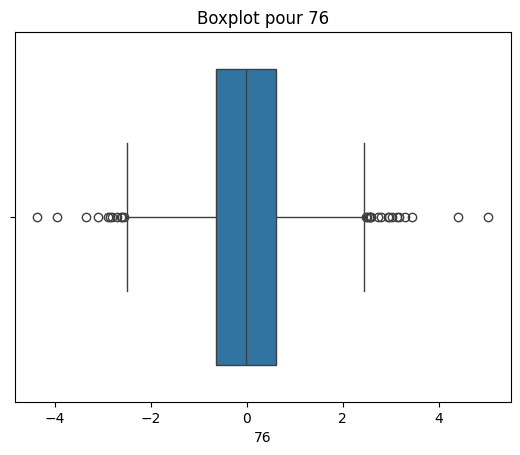

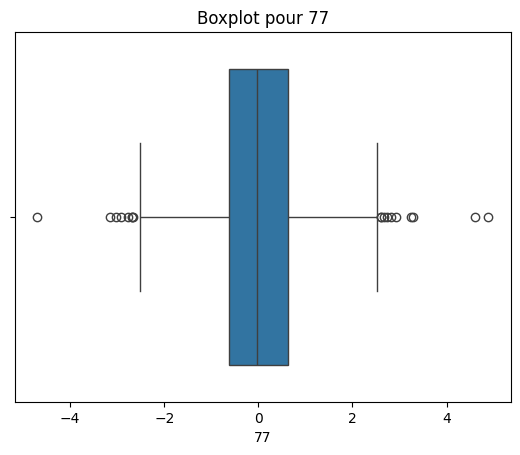

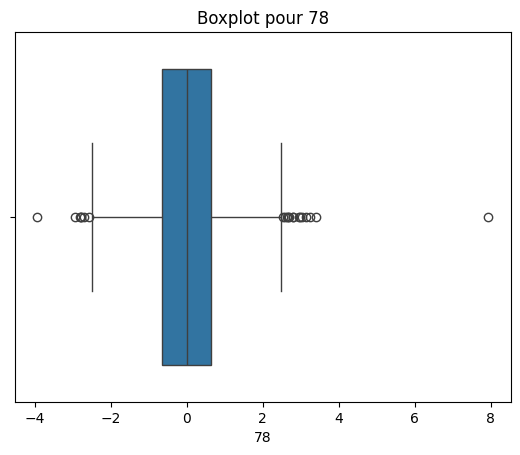

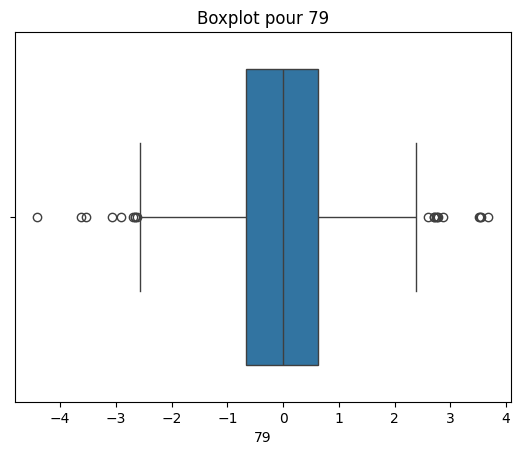

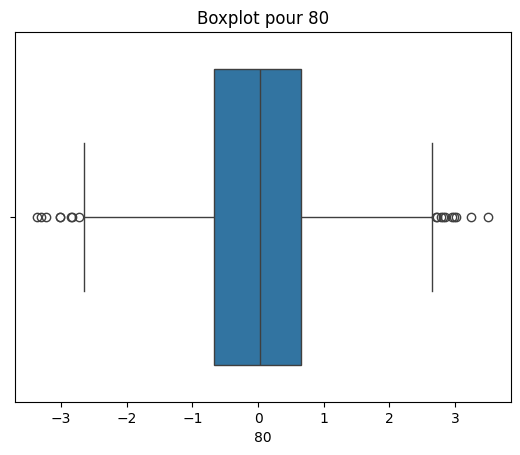

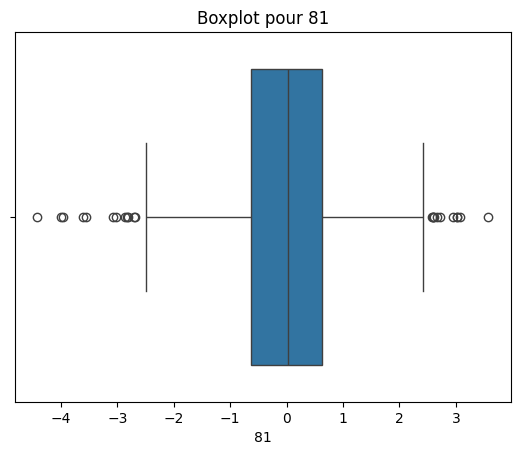

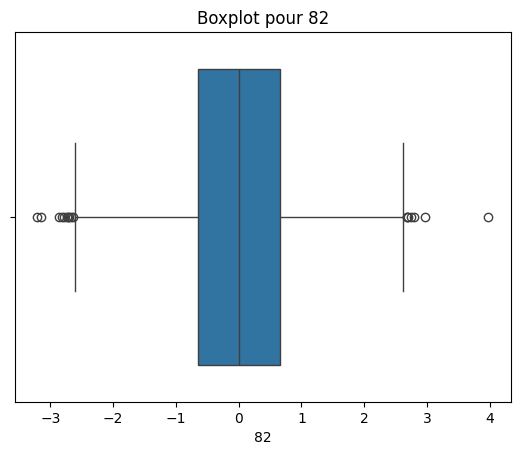

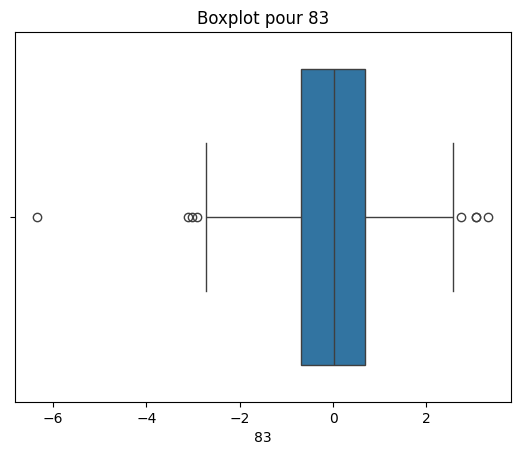

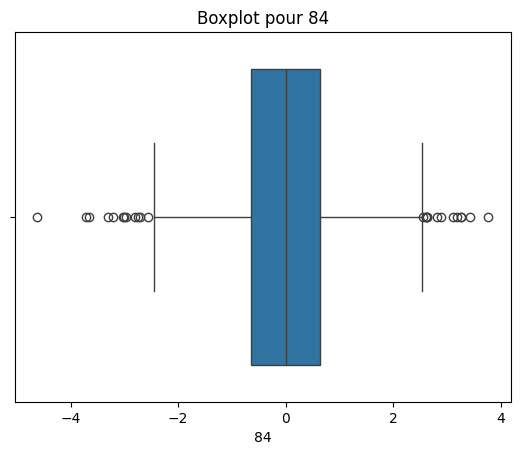

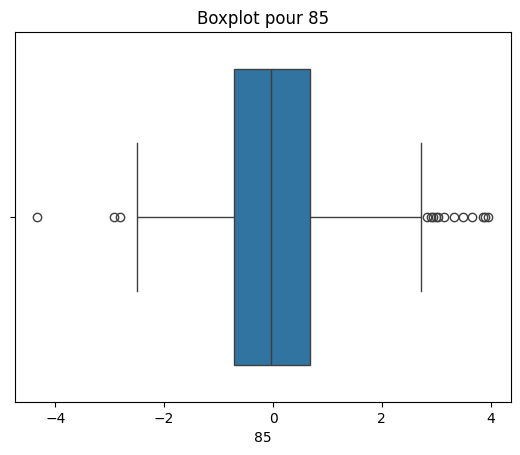

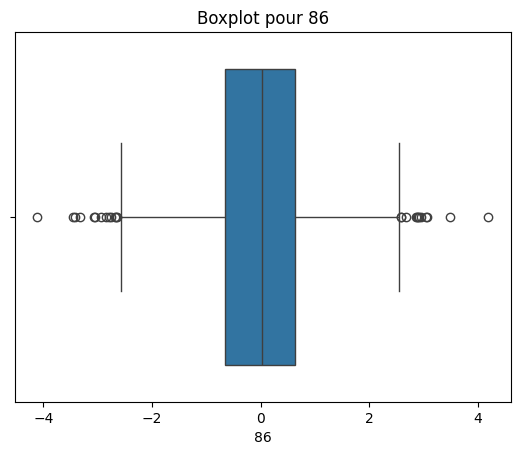

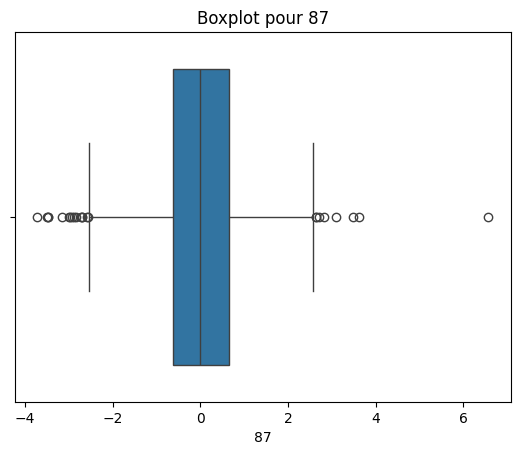

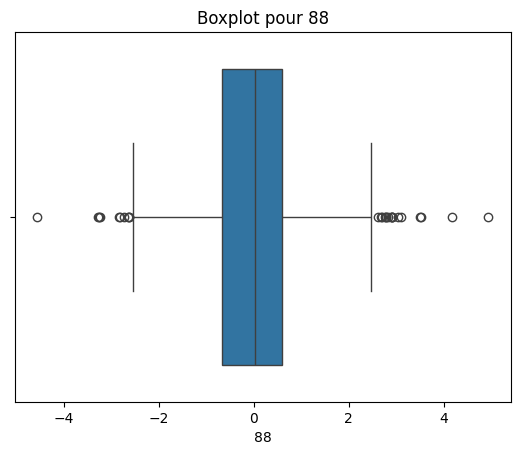

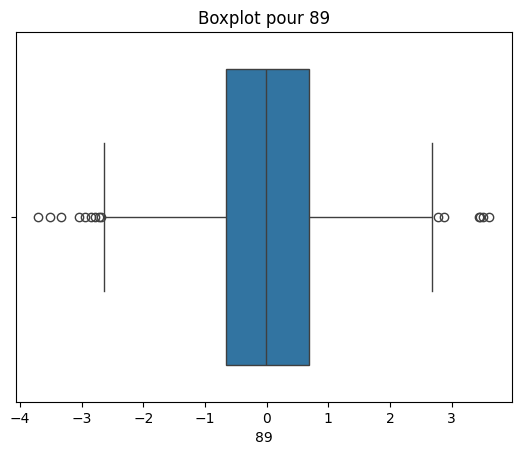

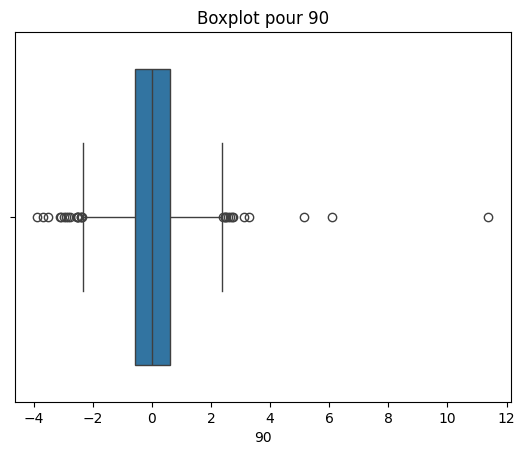

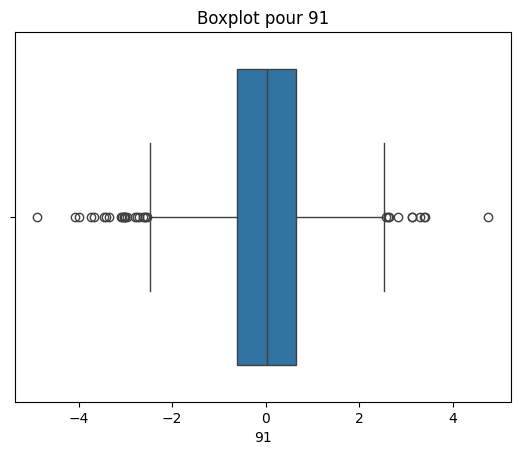

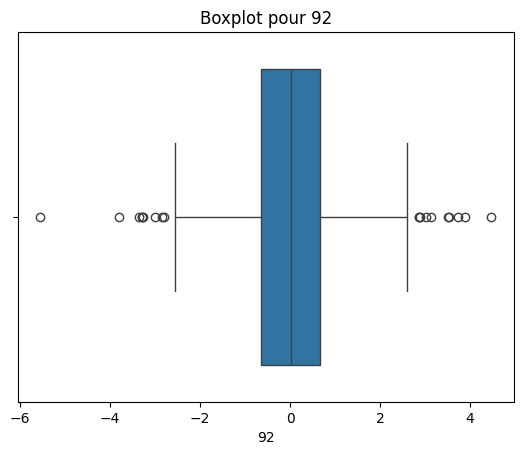

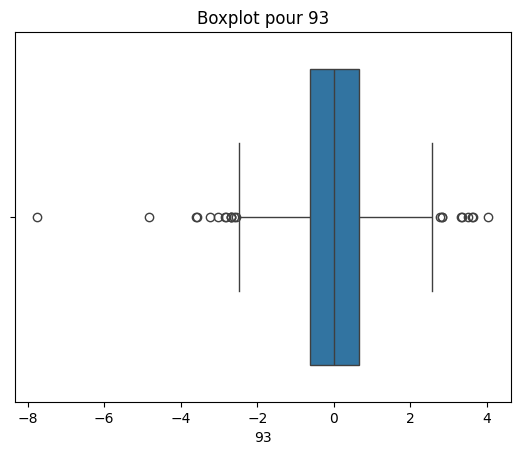

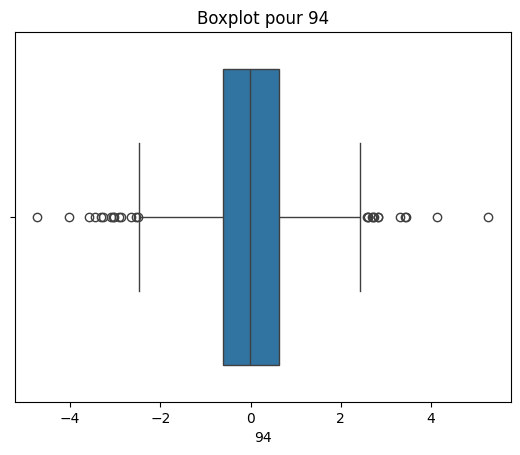

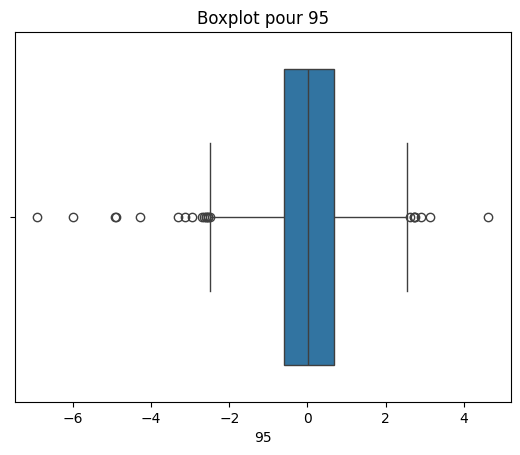

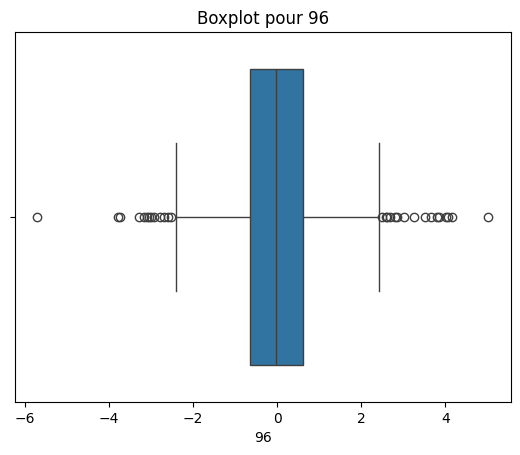

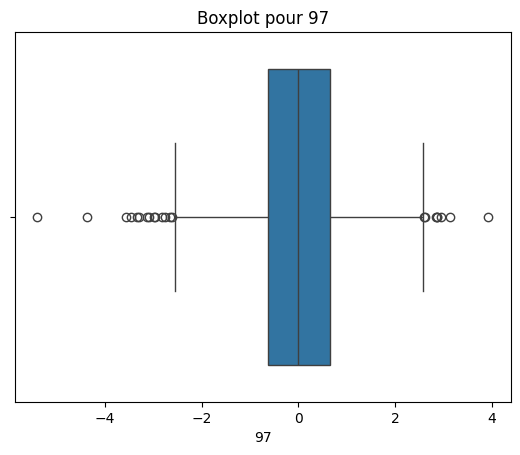

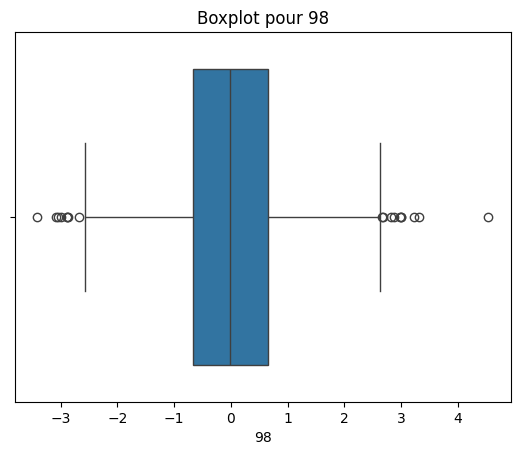

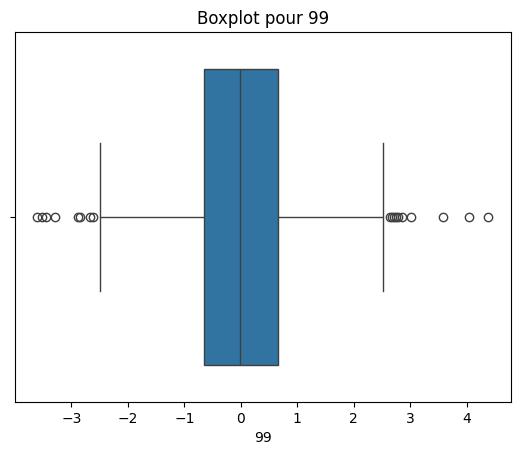

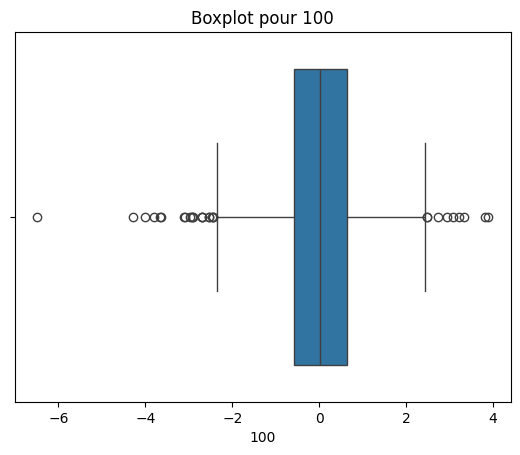

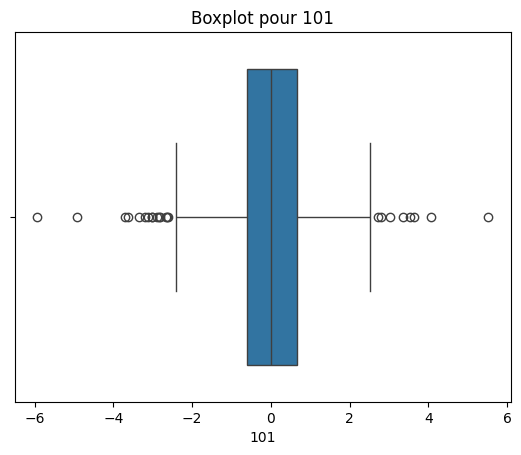

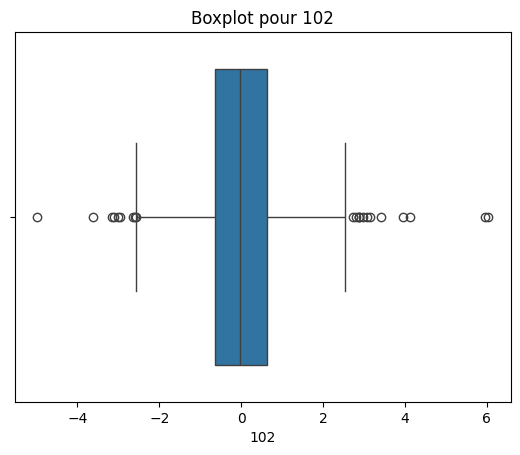

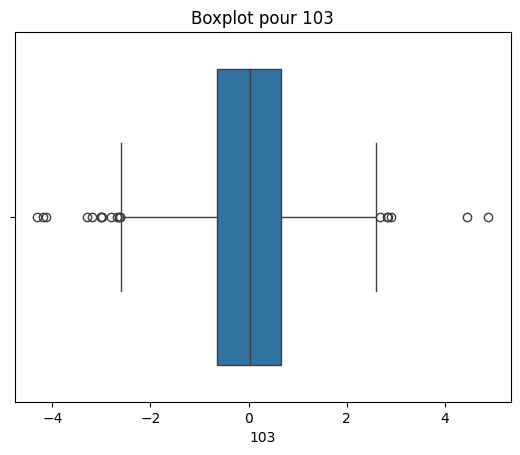

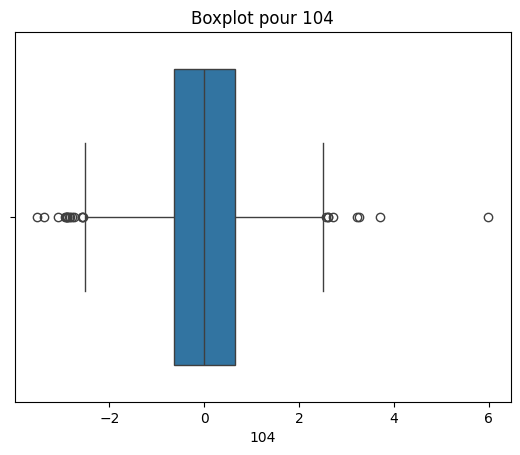

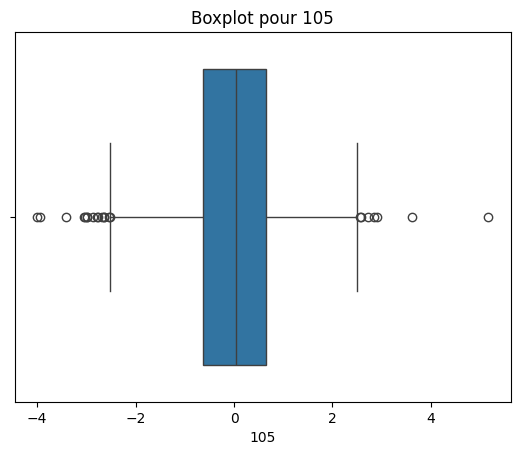

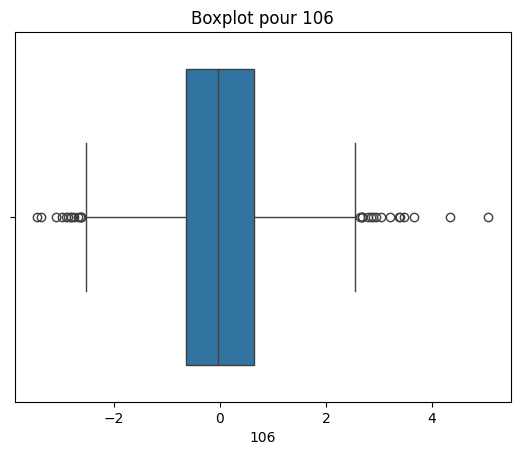

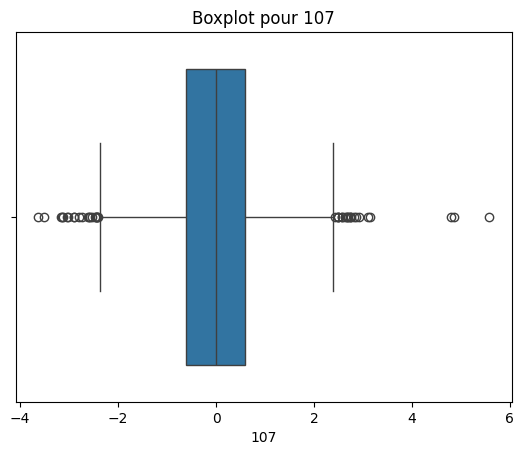

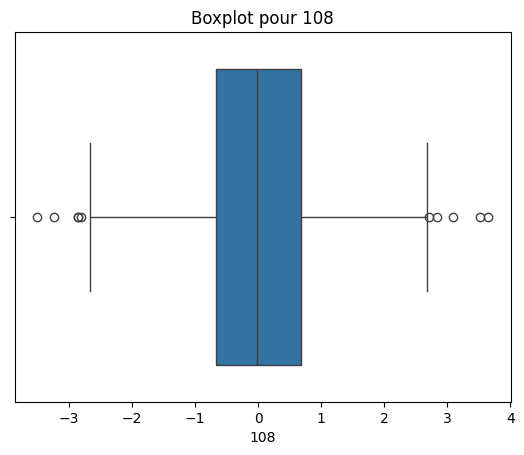

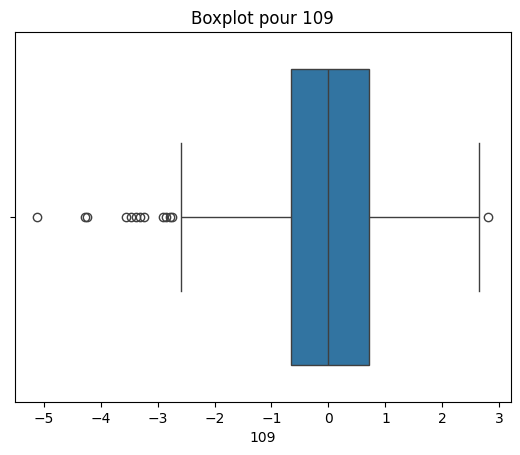

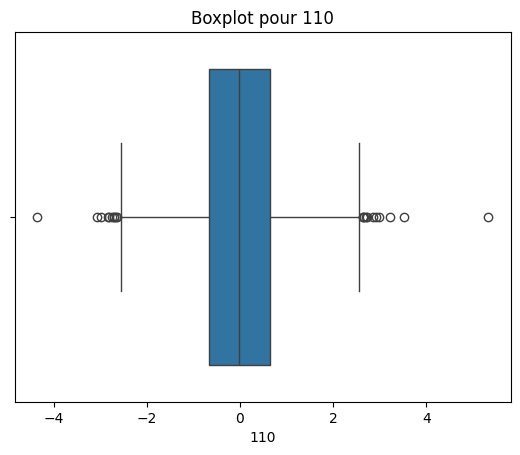

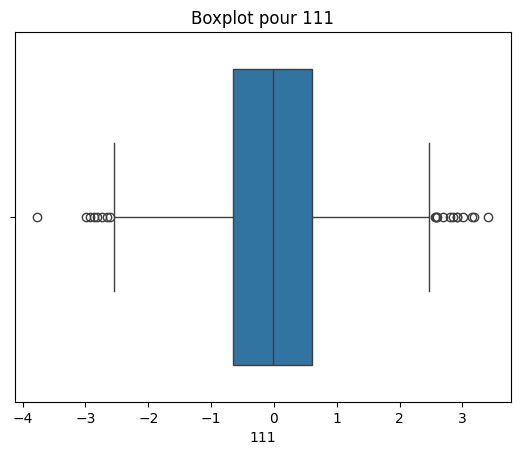

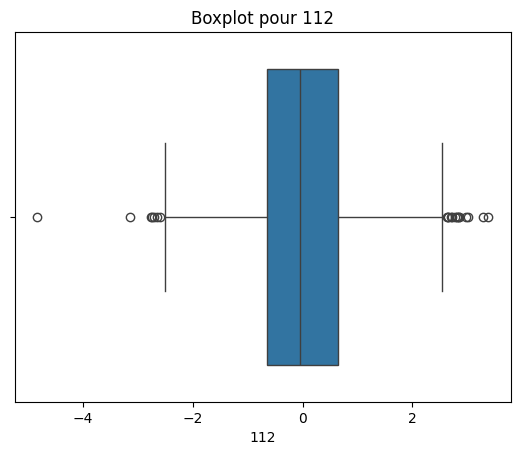

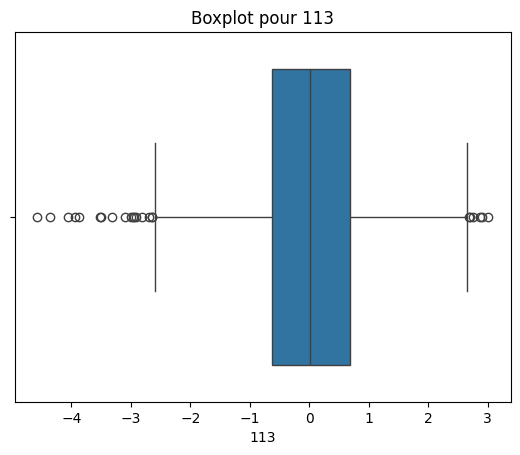

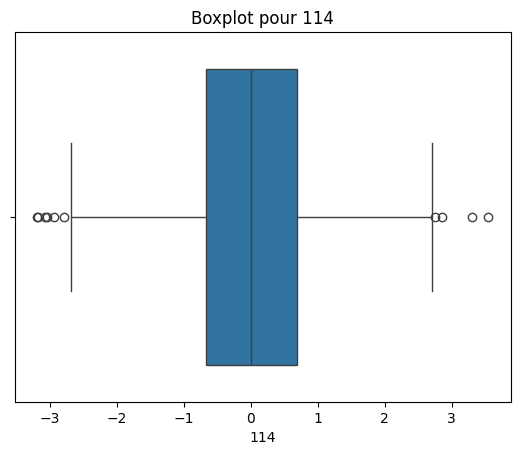

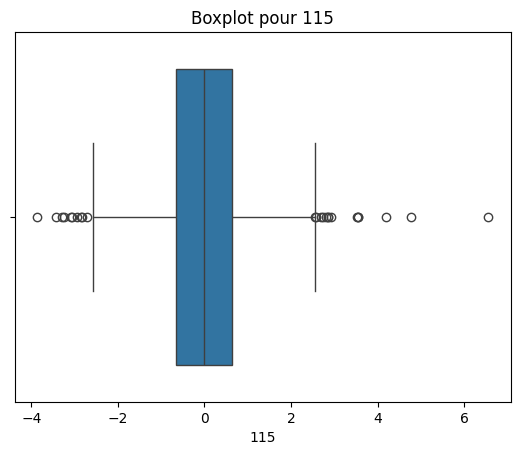

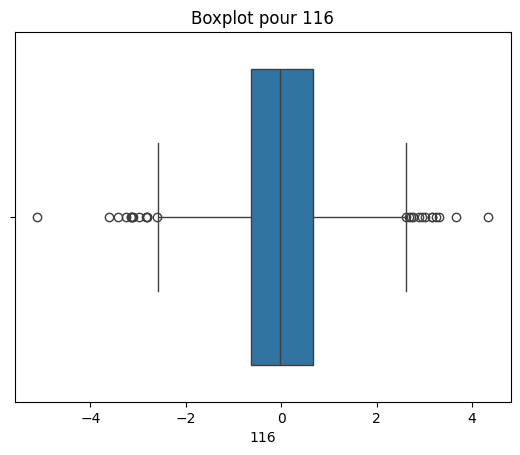

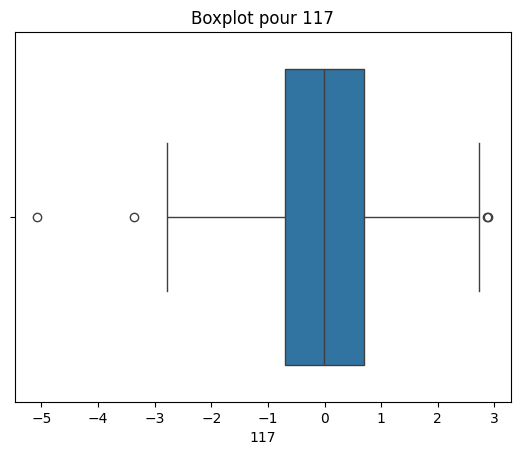

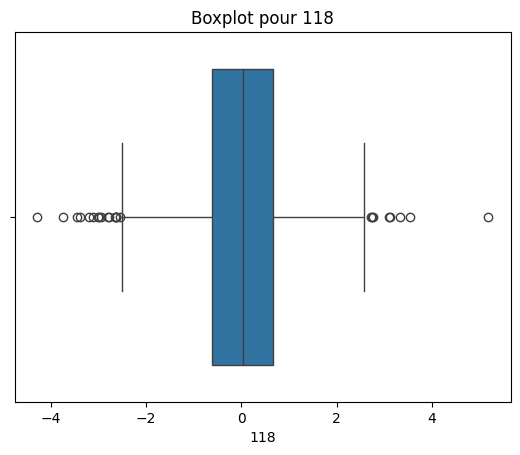

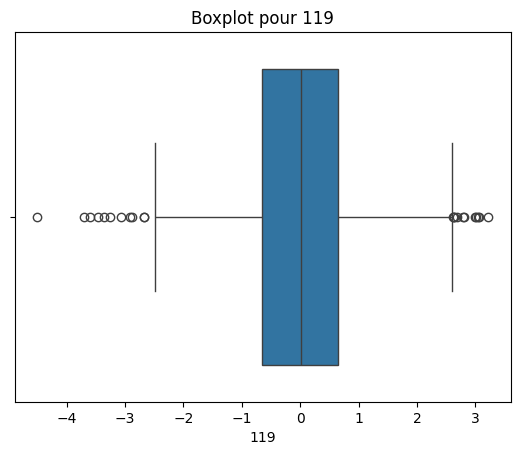

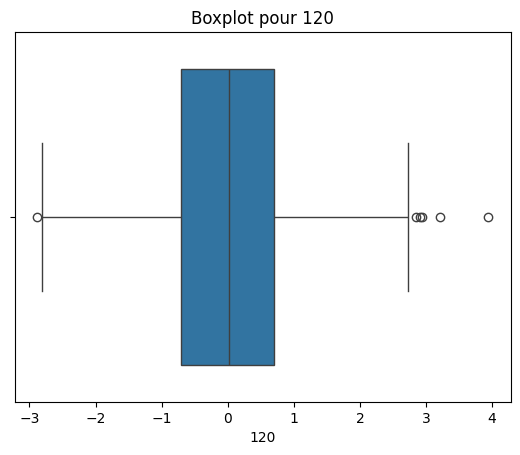

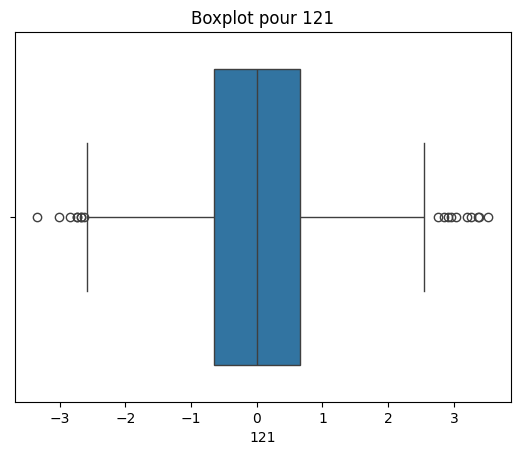

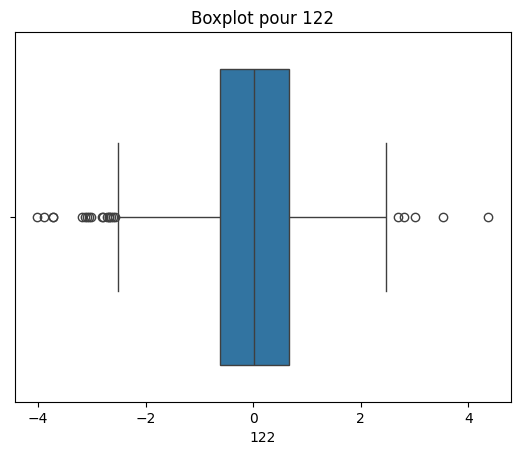

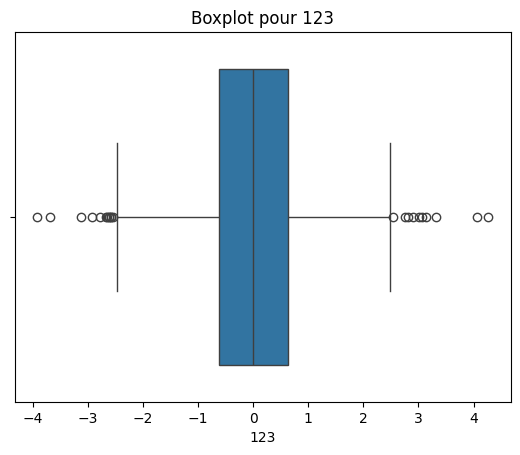

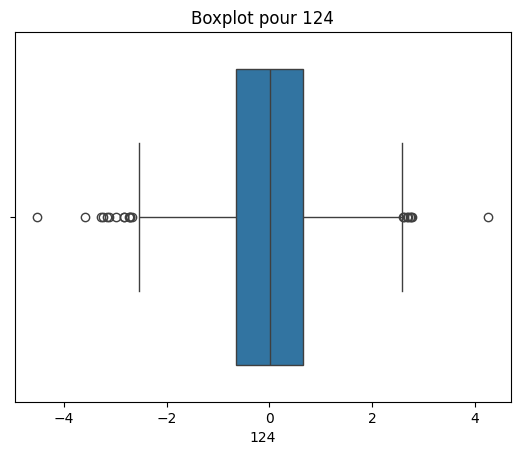

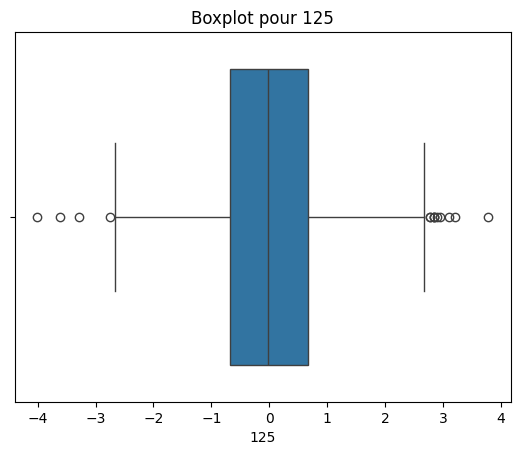

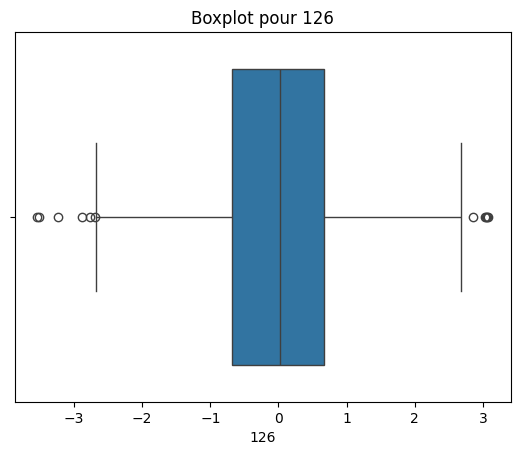

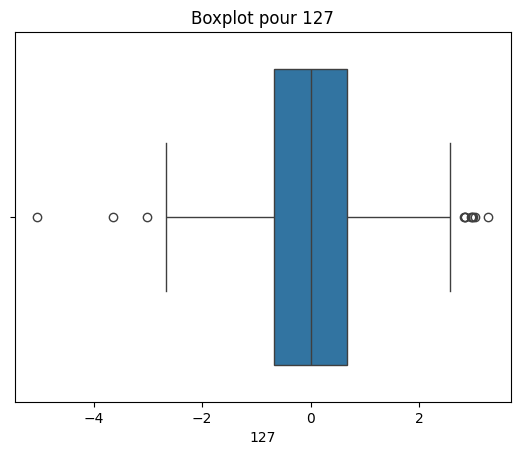

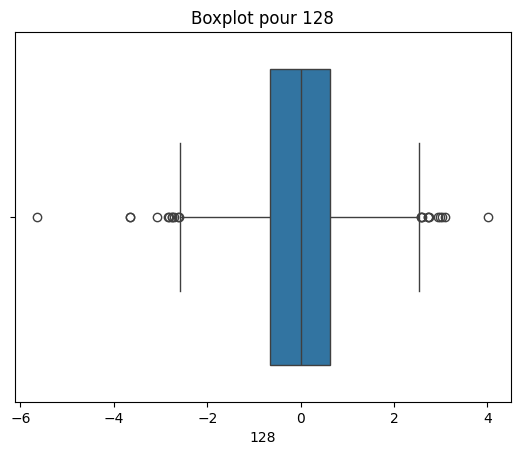

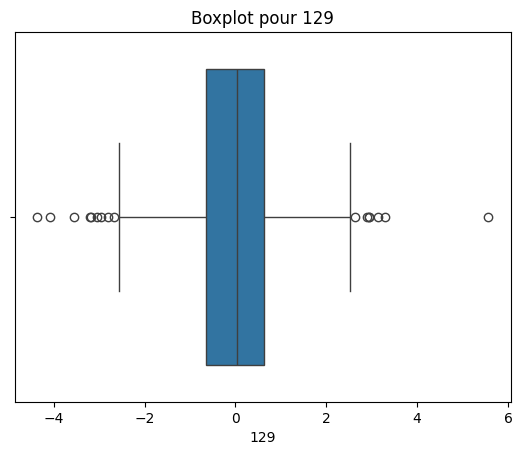

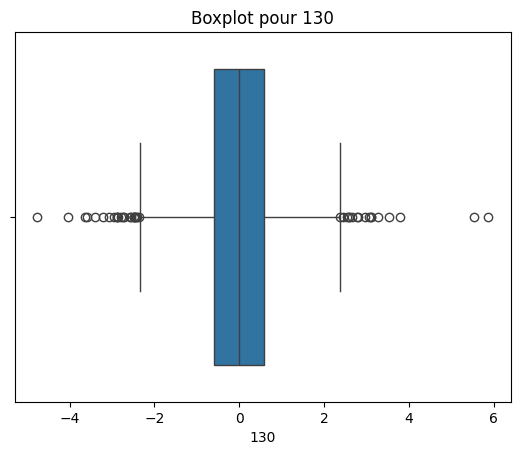

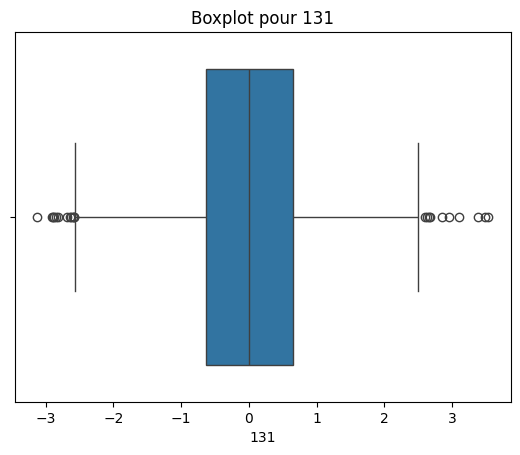

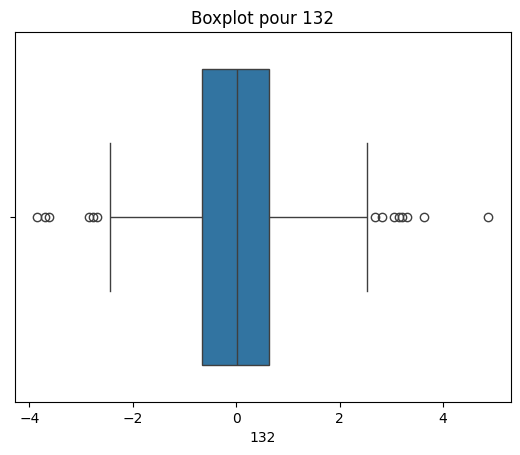

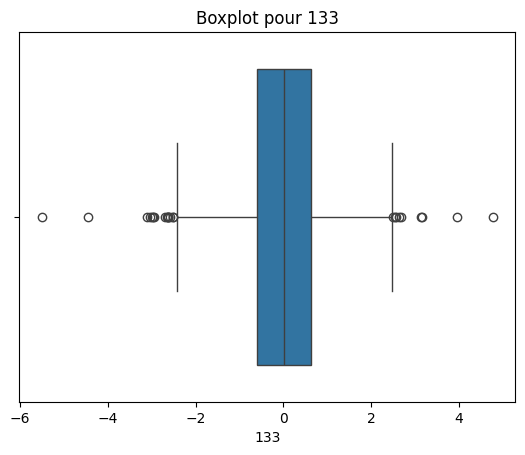

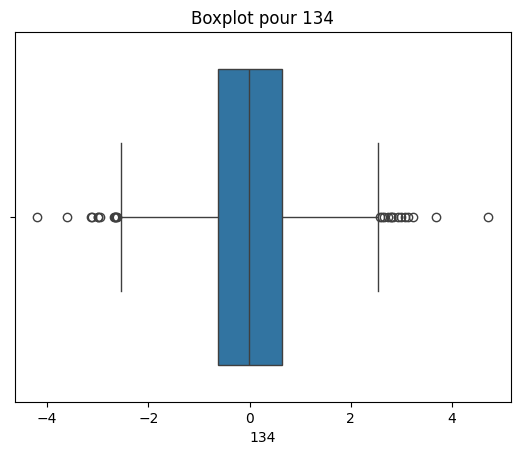

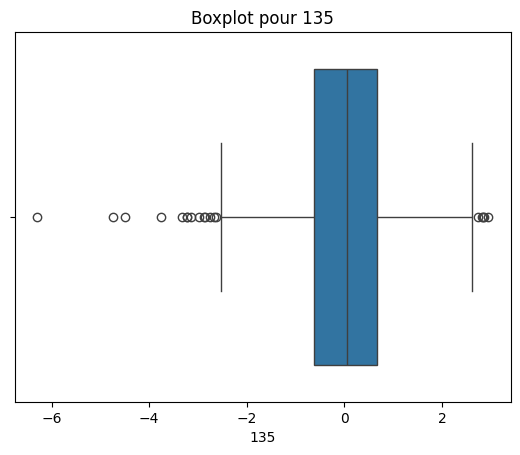

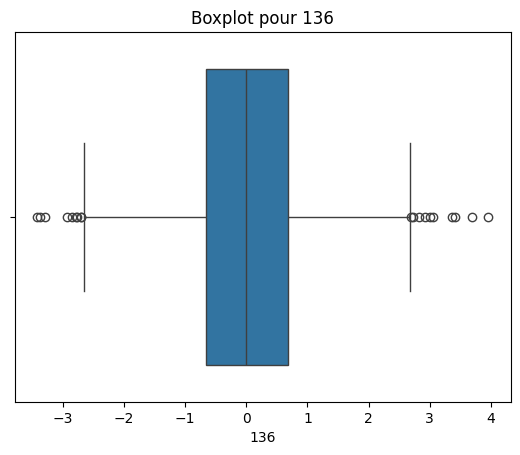

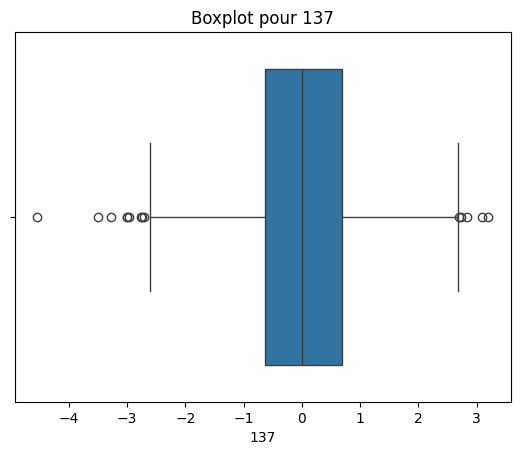

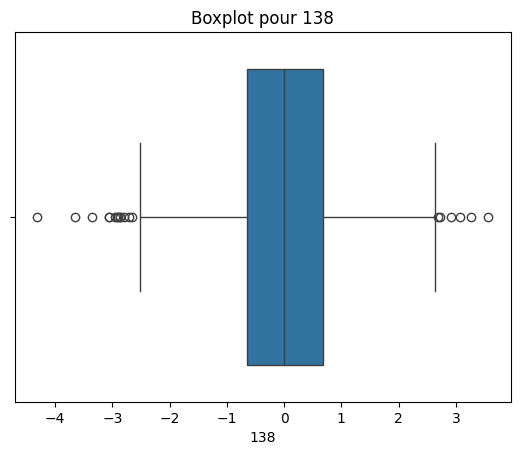

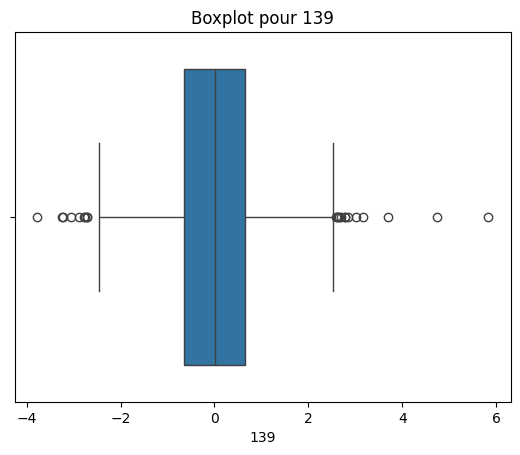

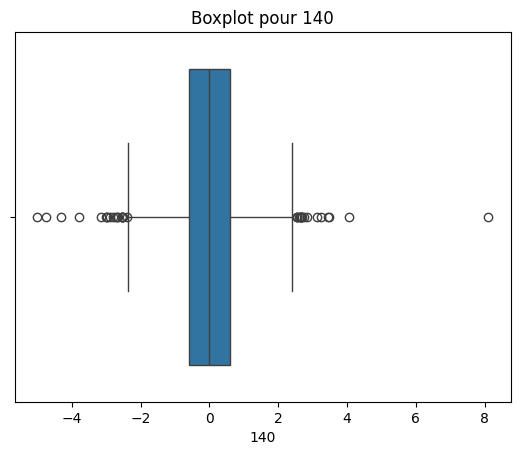

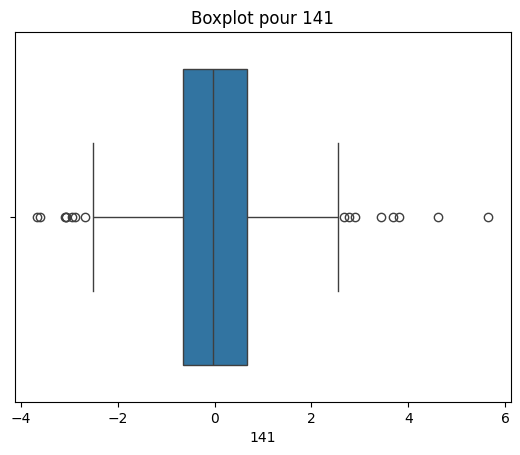

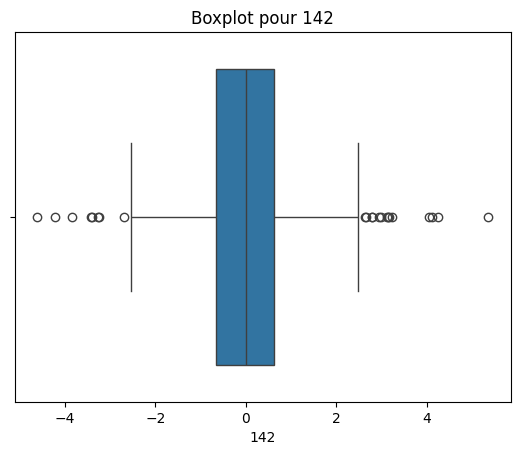

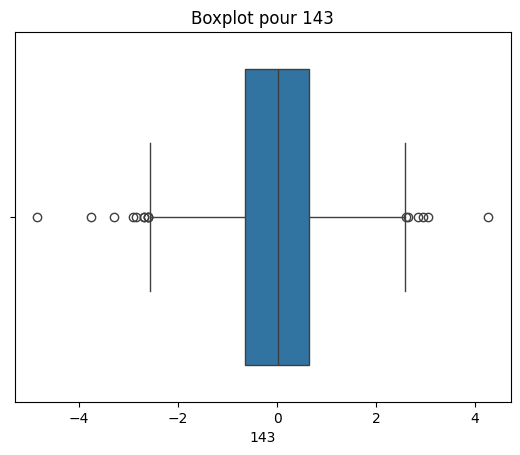

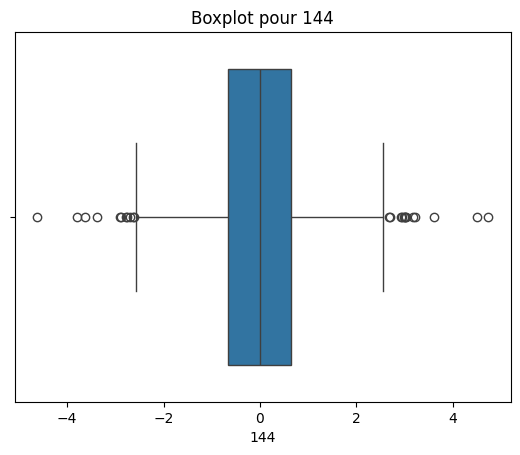

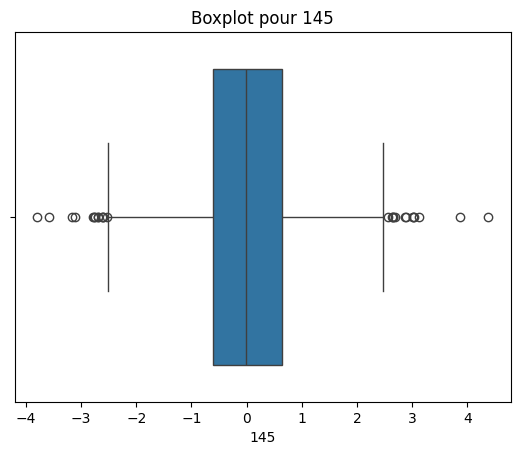

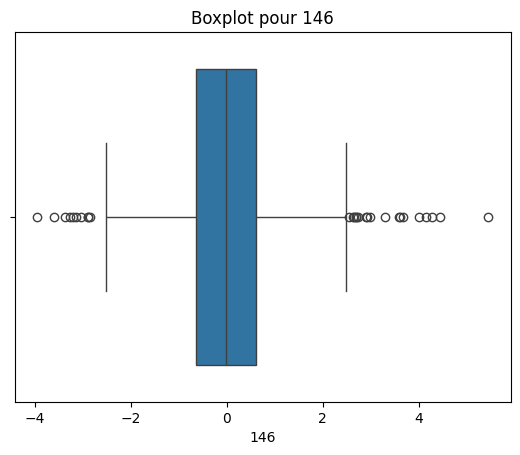

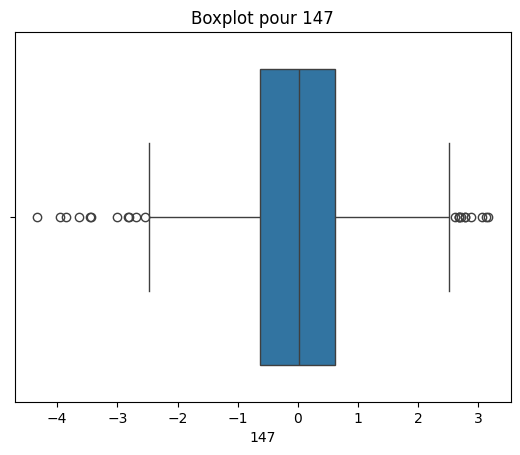

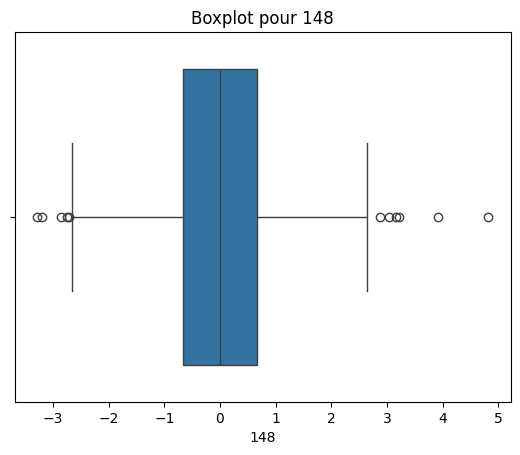

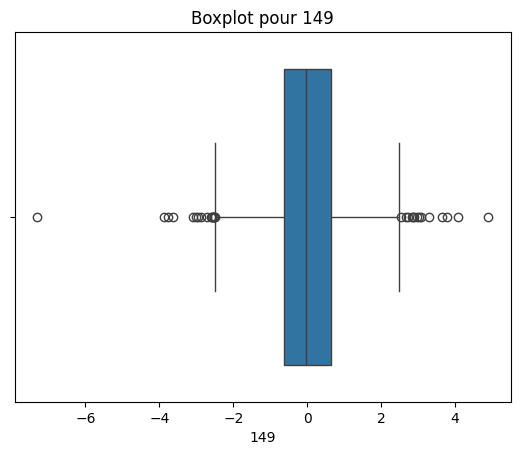

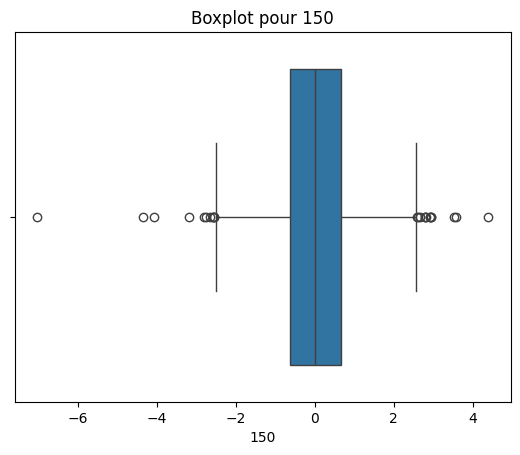

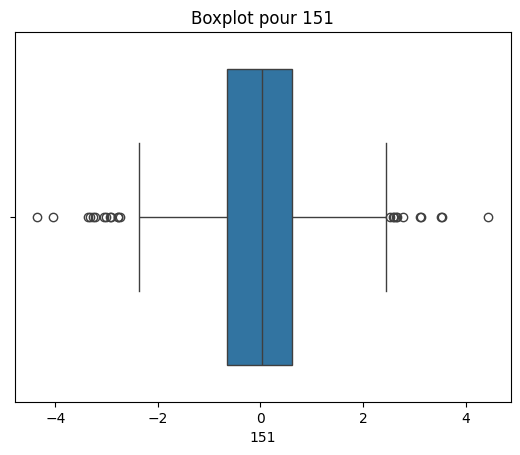

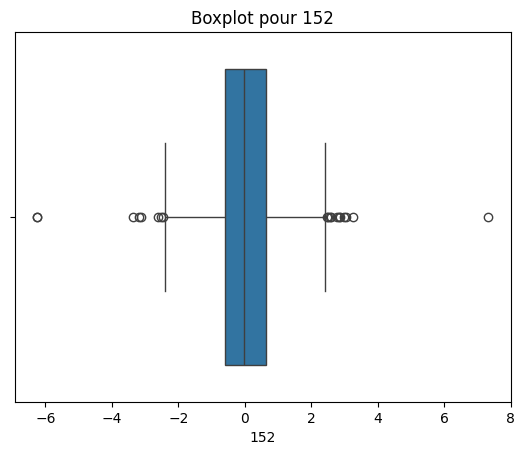

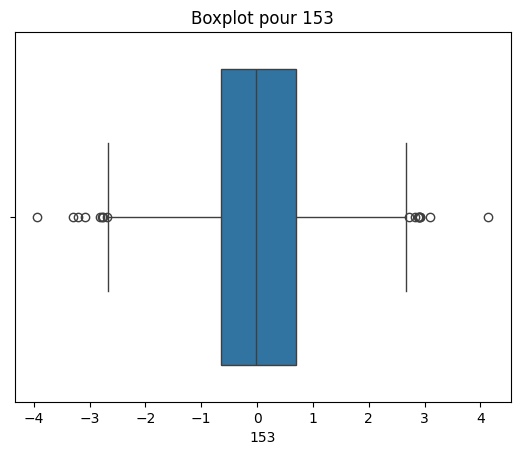

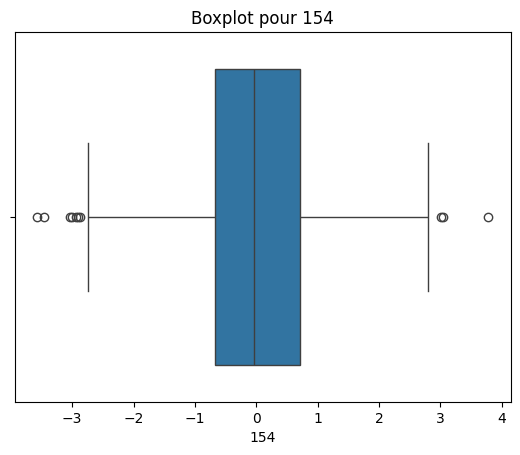

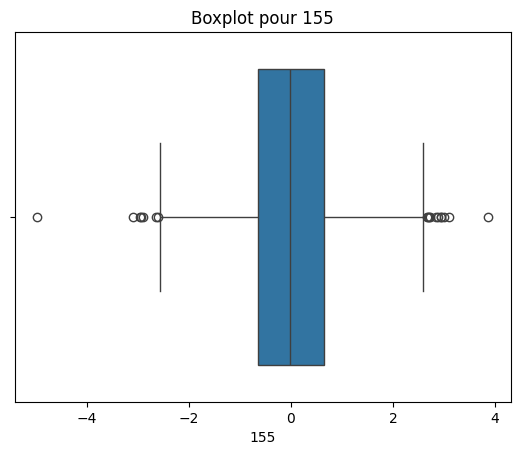

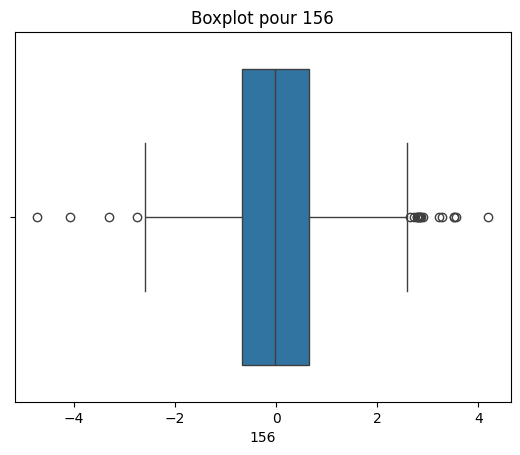

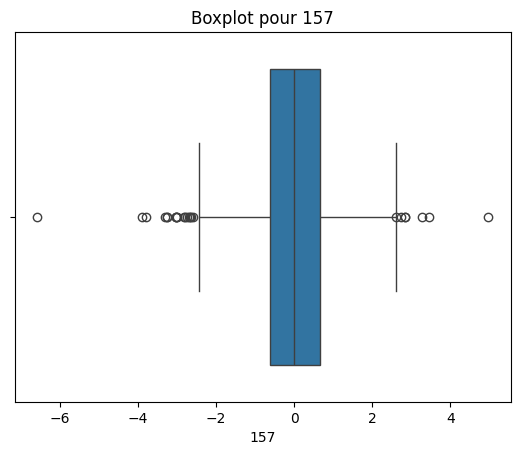

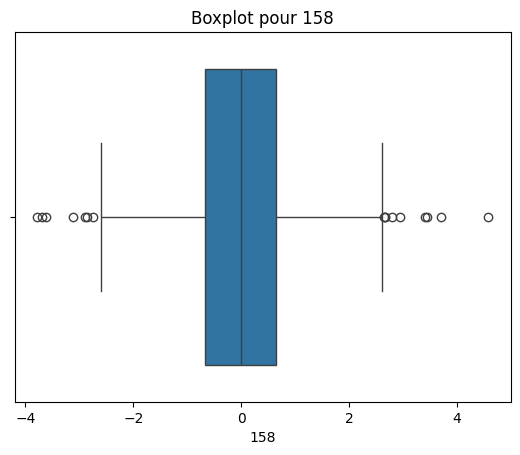

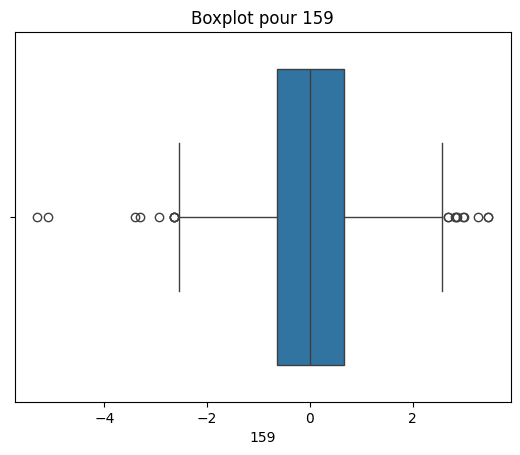

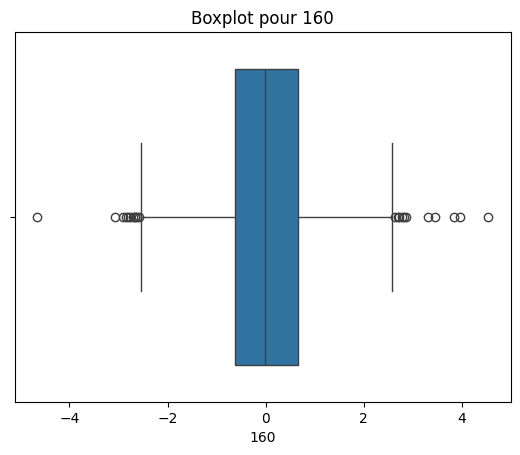

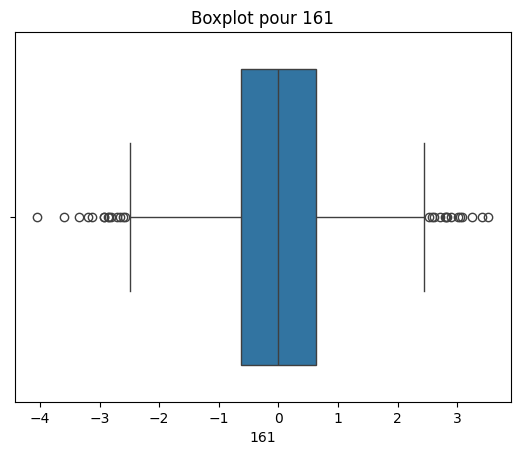

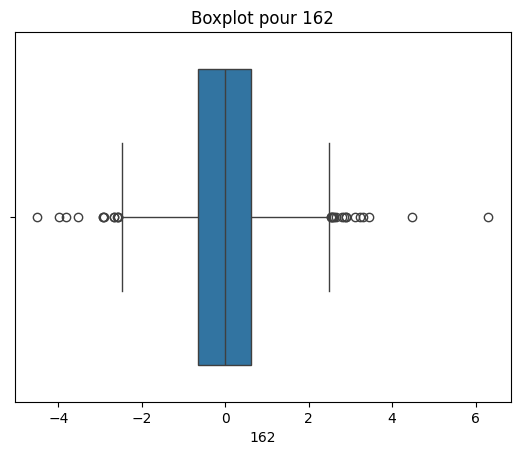

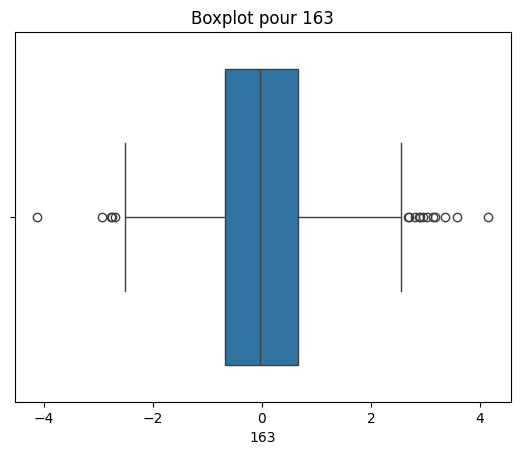

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données (remplacez par le chemin de votre fichier)
file_path = "/content/data_standardized.csv"  # Utilisez le fichier standardisé
df = pd.read_csv(file_path)

# Calculate correlation before dropping 'Pass/Fail'
correlation_matrix = df.corr()

# Now drop 'Pass/Fail' to get X and y
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# Trouver les features les plus corrélées avec la variable cible
correlation_with_target = correlation_matrix['Pass/Fail'].sort_values(ascending=False)

# Afficher les 10 features les plus corrélées positivement et négativement
print("Features les plus corrélées avec la variable cible (Pass/Fail):")
print(correlation_with_target.head(10))
print(correlation_with_target.tail(10))


# Identifier les features avec une forte corrélation (par exemple, > 0.7)
highly_correlated_features = correlation_matrix[abs(correlation_matrix) > 0.7]



# Analyse des valeurs aberrantes (boxplots)
for column in X.columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot pour {column}")
    plt.show()


In [18]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sqlite3

# Charger les données (remplacez par le chemin de votre fichier)
file_path = "/content/uci-secom-pca.csv"
df = pd.read_csv(file_path)


# Séparer les variables indépendantes (X) de la variable dépendante (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']


# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Pass/Fail'] = y

# Enregistrer les données standardisées dans un fichier CSV
df_scaled.to_csv('data_standardized.csv', index=False)


# Normaliser les données
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
df_normalized['Pass/Fail'] = y

# Enregistrer les données normalisées dans un fichier CSV
df_normalized.to_csv('data_normalized.csv', index=False)


# Enregistrer les données standardisées dans un fichier CSV
df_scaled.to_csv('data_standardized.csv', index=False)

# Enregistrer les données normalisées dans un fichier CSV
df_normalized.to_csv('data_normalized.csv', index=False)

print("Les données standardisées ont été enregistrées dans 'data_standardized.db' et 'data_standardized.csv'.")
print("Les données normalisées ont été enregistrées dans 'data_normalized.db' et 'data_normalized.csv'.")




Les données standardisées ont été enregistrées dans 'data_standardized.db' et 'data_standardized.csv'.
Les données normalisées ont été enregistrées dans 'data_normalized.db' et 'data_normalized.csv'.


In [19]:

import pandas as pd
# Charger les données
file_path = "/content/uci-secom-pca.csv"
df = pd.read_csv(file_path)

# Compter le nombre d'occurrences de chaque valeur dans la colonne 'Pass/Fail'
class_counts = df['Pass/Fail'].value_counts()

# Afficher les nombres d'occurrences pour chaque classe
print("Nombre d'occurrences pour chaque classe :")
print(class_counts)

# Identifier la classe majoritaire et la classe minoritaire
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Afficher la classe majoritaire et la classe minoritaire
print("\nClasse majoritaire :", majority_class)
print("Classe minoritaire :", minority_class)


Nombre d'occurrences pour chaque classe :
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

Classe majoritaire : -1
Classe minoritaire : 1


In [20]:

import pandas as pd
from sklearn.utils import resample

def balance_dataset(file_path):
  """
  Équilibre les classes d'un ensemble de données en utilisant le sur-échantillonnage
  de la classe minoritaire.

  Args:
    file_path: Le chemin d'accès au fichier CSV contenant les données.

  Returns:
    Un DataFrame pandas avec les classes équilibrées.
  """
  df = pd.read_csv(file_path)

  # Séparer les données en fonction de la classe
  df_majority = df[df['Pass/Fail'] == -1]
  df_minority = df[df['Pass/Fail'] == 1]

  # Sur-échantillonner la classe minoritaire
  df_minority_upsampled = resample(df_minority,
                                  replace=True,  # échantillon avec remplacement
                                  n_samples=len(df_majority),  # nombre d'échantillons égal à la classe majoritaire
                                  random_state=42)  # reproductibilité

  # Combiner les données sur-échantillonnées avec la classe majoritaire
  df_upsampled = pd.concat([df_majority, df_minority_upsampled])

  return df_upsampled



# Équilibrer les classes pour les trois fichiers
df_pca_balanced = balance_dataset("/content/uci-secom-pca.csv")
df_normalized_balanced = balance_dataset("data_normalized.csv")
df_standardized_balanced = balance_dataset("data_standardized.csv")


# Enregistrer les nouveaux fichiers CSV équilibrés
df_pca_balanced.to_csv("uci-secom-pca-balanced.csv", index=False)
df_normalized_balanced.to_csv("data_normalized-balanced.csv", index=False)
df_standardized_balanced.to_csv("data_standardized-balanced.csv", index=False)

print("Les ensembles de données ont été équilibrés et enregistrés avec le suffixe '-balanced'.")


Les ensembles de données ont été équilibrés et enregistrés avec le suffixe '-balanced'.


Evaluation du modèle pour uci-secom-pca-balanced.csv:
Matrice de confusion:
 [[267  33]
 [  0 286]]
Accuracy: 0.9436860068259386
Precision: 0.896551724137931
Recall: 1.0
Score F1: 0.9454545454545454
AUC: 0.9450000000000001




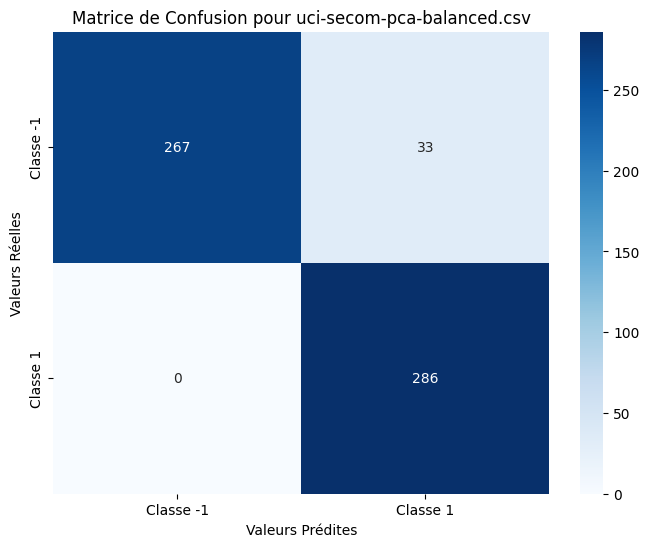

Evaluation du modèle pour data_normalized-balanced.csv:
Matrice de confusion:
 [[267  33]
 [  0 286]]
Accuracy: 0.9436860068259386
Precision: 0.896551724137931
Recall: 1.0
Score F1: 0.9454545454545454
AUC: 0.9450000000000001




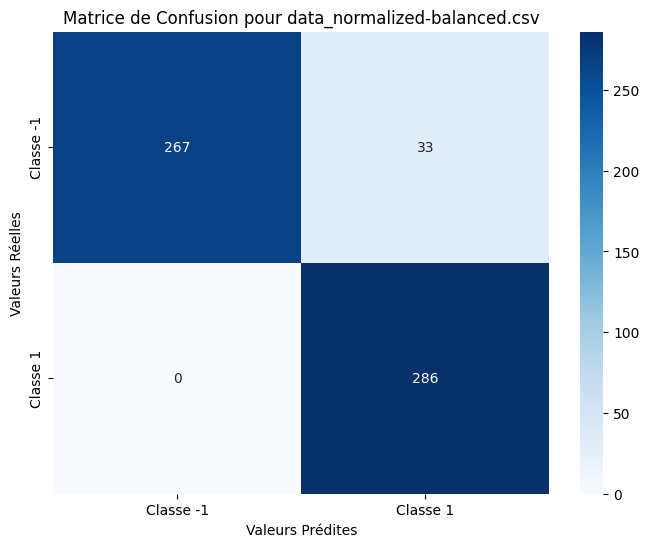

Evaluation du modèle pour data_standardized-balanced.csv:
Matrice de confusion:
 [[267  33]
 [  0 286]]
Accuracy: 0.9436860068259386
Precision: 0.896551724137931
Recall: 1.0
Score F1: 0.9454545454545454
AUC: 0.9450000000000001




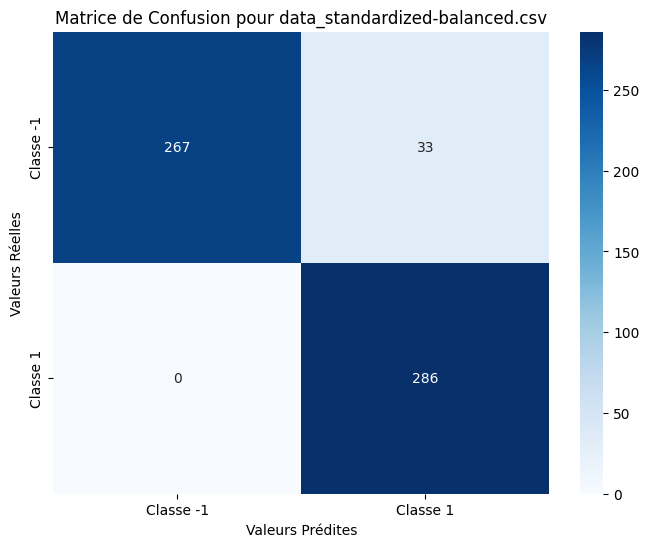

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Importing the missing function
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix



def evaluate_decision_tree(file_path):
  """
  Entraîne un modèle d'arbre de décision sur un ensemble de données,
  effectue une évaluation et affiche les résultats.

  Args:
    file_path: Chemin d'accès au fichier CSV contenant les données.
  """

  df = pd.read_csv(file_path)
  X = df.drop('Pass/Fail', axis=1)
  y = df['Pass/Fail']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Entraîner le modèle d'arbre de décision
  model = DecisionTreeClassifier(random_state=42)
  model.fit(X_train, y_train)

  # Faire des prédictions sur l'ensemble de test
  y_pred = model.predict(X_test)

  # Évaluer le modèle
  conf_matrix = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Calculer la courbe ROC et l'AUC
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  print(f"Evaluation du modèle pour {file_path}:")
  print("Matrice de confusion:\n", conf_matrix)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("Score F1:", f1)
  print("AUC:", roc_auc)
  print("\n")

  # Visualiser la matrice de confusion avec les couleurs
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Classe -1', 'Classe 1'],
              yticklabels=['Classe -1', 'Classe 1'])
  plt.title(f'Matrice de Confusion pour {file_path}')
  plt.xlabel('Valeurs Prédites')
  plt.ylabel('Valeurs Réelles')
  plt.show()


# Évaluer les modèles sur les ensembles de données préparés
evaluate_decision_tree("uci-secom-pca-balanced.csv")
evaluate_decision_tree("data_normalized-balanced.csv")
evaluate_decision_tree("data_standardized-balanced.csv")



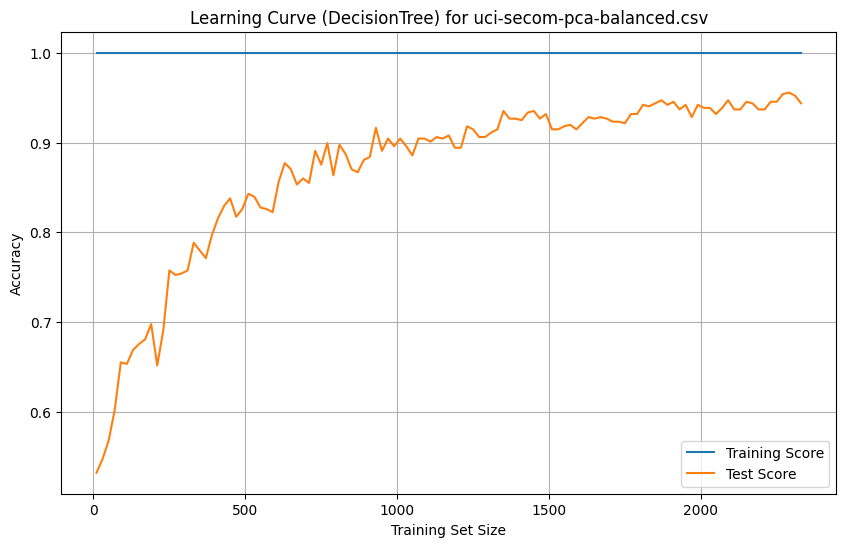

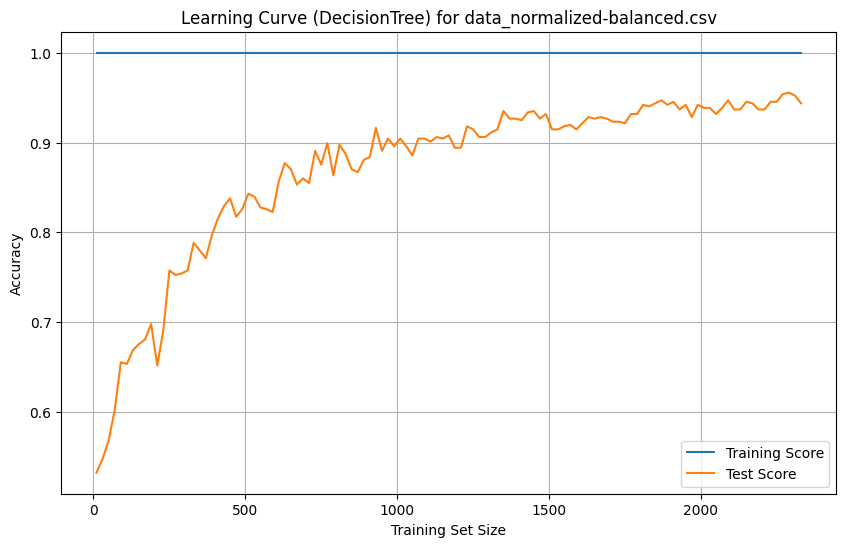

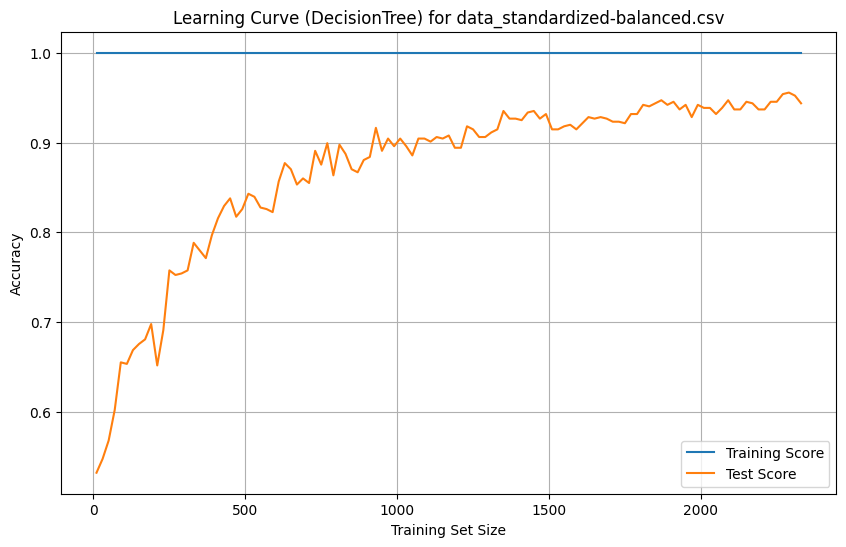

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


def plot_learning_curve(file_path, model_type="DecisionTree"):
    """
    Plots the learning curve for a given model and dataset.

    Args:
        file_path (str): The path to the CSV file containing the data.
        model_type (str, optional): The type of model to use.
                                    Defaults to "DecisionTree".
    """

    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_scores = []
    test_scores = []
    train_sizes = range(10, len(X_train), 20)  # Adjust the step size as needed

    for train_size in train_sizes:
        if model_type == "DecisionTree":
            model = DecisionTreeClassifier(random_state=42)
        else:
            raise ValueError("Invalid model_type. Choose 'DecisionTree'.")

        # Fit the model on a subset of the training data
        model.fit(X_train[:train_size], y_train[:train_size])

        # Evaluate on the training and test sets
        train_scores.append(accuracy_score(y_train[:train_size], model.predict(X_train[:train_size])))
        test_scores.append(accuracy_score(y_test, model.predict(X_test)))

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label="Training Score")
    plt.plot(train_sizes, test_scores, label="Test Score")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve ({model_type}) for {file_path}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_learning_curve("uci-secom-pca-balanced.csv")
plot_learning_curve("data_normalized-balanced.csv")
plot_learning_curve("data_standardized-balanced.csv")

In [25]:
#Random_Forest_Model

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Charger les données (remplacez par le chemin de votre fichier)
file_path = "/content/uci-secom-pca-balanced.csv"  # Par exemple, utilisez l'ensemble de données équilibré
df = pd.read_csv(file_path)

# Séparer les variables indépendantes (X) de la variable dépendante (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle de forêt aléatoire
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Vous pouvez ajuster les paramètres

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Vous pouvez également enregistrer le modèle entraîné pour une utilisation ultérieure
# import pickle
# filename = 'random_forest_model.sav'
# pickle.dump(model, open(filename, 'wb'))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       286

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586


Confusion Matrix:
 [[300   0]
 [  0 286]]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2057 - loss: 0.7429 - val_accuracy: 0.0000e+00 - val_loss: -0.3665
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0385 - loss: -0.9623 - val_accuracy: 0.0406 - val_loss: -2.4235
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0897 - loss: -4.1241 - val_accuracy: 0.1004 - val_loss: -10.1486
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1175 - loss: -16.8759 - val_accuracy: 0.2051 - val_loss: -38.7455
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1740 - loss: -65.4495 - val_accuracy: 0.2350 - val_loss: -119.5623
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2085 - loss: -188.7118 - val_accuracy: 0.2500 - val_loss: -284.9335
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2431 - loss: -432.0430 - val_accuracy: 0.2906 - val_loss: -565.2770
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2606 - loss: -818.1

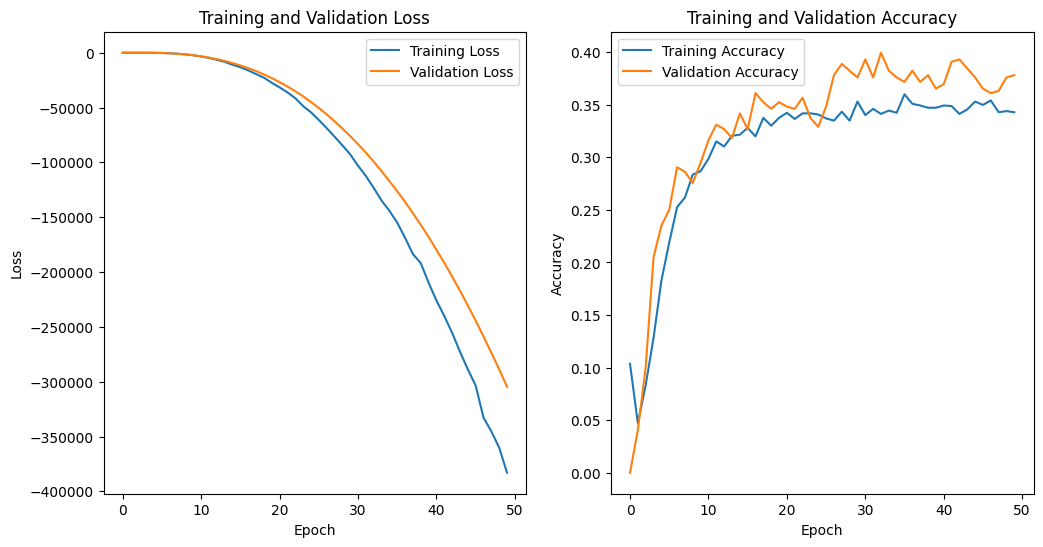

In [26]:
#Réseau de Neurone Model

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Charger les données (remplacez par le chemin de votre fichier)
file_path = "/content/uci-secom-pca-balanced.csv"  # Par exemple, utilisez l'ensemble de données équilibré
df = pd.read_csv(file_path)

# Séparer les variables indépendantes (X) de la variable dépendante (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importer TensorFlow et Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Définir le modèle de réseau neuronal
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle et stocker l'historique
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Visualiser les courbes d'entraînement et de validation
plt.figure(figsize=(12, 6))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
print("Valeurs uniques dans y_test :", y_test.unique())


Valeurs uniques dans y_test : [-1  1]


In [30]:
#Rapport de Validation

from sklearn.metrics import classification_report, confusion_matrix

# Remplacer -1 par 0 pour compatibilité avec sklearn
y_test_binary = y_test.replace(-1, 0)
y_pred_binary = y_pred.copy()  # S'assurer que y_pred est une copie et non une vue
y_pred_binary[y_pred == -1] = 0  # Remplace -1 par 0 dans les prédictions

# Matrice de confusion
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Matrice de confusion :\n", cm)

# Rapport de classification
print("\nRapport de classification :\n", classification_report(y_test_binary, y_pred_binary, target_names=["Classe 0 (-1)", "Classe 1 (1)"]))



Matrice de confusion :
 [[300   0]
 [  0 286]]

Rapport de classification :
                precision    recall  f1-score   support

Classe 0 (-1)       1.00      1.00      1.00       300
 Classe 1 (1)       1.00      1.00      1.00       286

     accuracy                           1.00       586
    macro avg       1.00      1.00      1.00       586
 weighted avg       1.00      1.00      1.00       586



In [31]:

import pandas as pd
# Charger les données (remplacez par le chemin de votre fichier)
file_path = "/content/uci-secom-pca-balanced.csv"  # Par exemple, utilisez l'ensemble de données équilibré
df = pd.read_csv(file_path)

# Séparer les variables indépendantes (X) de la variable dépendante (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importer TensorFlow et Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Définir le modèle de réseau neuronal
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),  # Pour éviter le sur-apprentissage
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Couche de sortie pour la classification binaire
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Évaluer le modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Vous pouvez également enregistrer le modèle entraîné pour une utilisation ultérieure
# model.save('my_neural_network_model')


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1528 - loss: 0.4296 - val_accuracy: 0.0214 - val_loss: -0.7202
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0641 - loss: -1.3598 - val_accuracy: 0.0705 - val_loss: -3.8721
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0803 - loss: -6.9959 - val_accuracy: 0.1560 - val_loss: -17.3418
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1409 - loss: -30.0517 - val_accuracy: 0.2201 - val_loss: -59.7007
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2146 - loss: -90.3398 - val_accuracy: 0.2607 - val_loss: -158.7153
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2559 - loss: -233.2725 - val_accuracy: 0.2350 - val_loss: -345.4922
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2557 - loss: -492.1071 - val_accuracy: 0.3077 - val_loss: -647.4128
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3049 - loss: -893.4764 - val_accuracy

In [32]:

import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Charger les données (remplacez par le chemin de votre fichier)
file_path = "/content/uci-secom-pca-balanced.csv"  # Par exemple, utilisez l'ensemble de données équilibré
df = pd.read_csv(file_path)

# Séparer les variables indépendantes (X) de la variable dépendante (y)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle AdaBoost avec un classificateur d'arbre de décision comme estimateur de base
model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # Arbre de décision simple
    n_estimators=50,  # Nombre d'estimateurs (arbres de décision)
    learning_rate=1.0,  # Taux d'apprentissage
    random_state=42
)

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8686006825938567

Classification Report:
               precision    recall  f1-score   support

          -1       0.93      0.80      0.86       300
           1       0.82      0.94      0.87       286

    accuracy                           0.87       586
   macro avg       0.88      0.87      0.87       586
weighted avg       0.88      0.87      0.87       586


Confusion Matrix:
 [[240  60]
 [ 17 269]]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluation des modèles sur : uci-secom-pca-balanced.csv
Evaluation du modèle pour uci-secom-pca-balanced.csv:
Matrice de confusion:
 [[267  33]
 [  0 286]]
Accuracy: 0.9436860068259386
Precision: 0.896551724137931
Recall: 1.0
Score F1: 0.9454545454545454
AUC: 0.9450000000000001




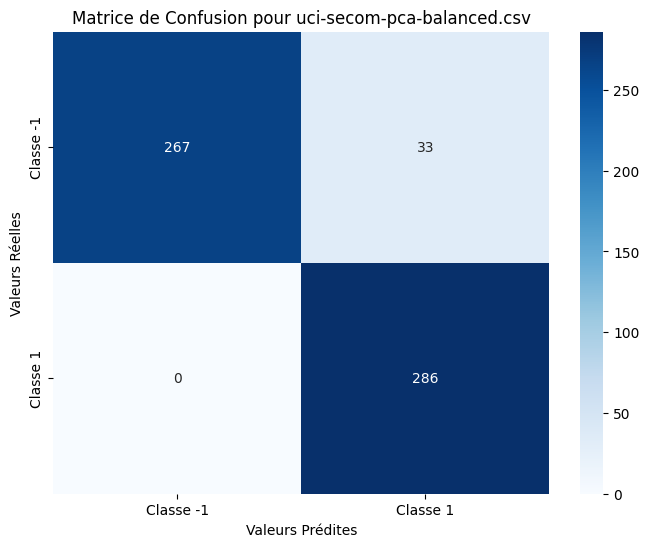

Résultats de la validation croisée pour Arbre de décision sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [0.94368601 0.95042735 0.95384615 0.96752137 0.97094017]
Accuracy moyenne: 0.9572842099121963


Résultats de la validation simple pour Random Forest sur uci-secom-pca-balanced.csv:
Accuracy: 1.0
Résultats de la validation croisée pour Random Forest sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [1. 1. 1. 1. 1.]
Accuracy moyenne: 1.0


Résultats de la validation simple pour AdaBoost sur uci-secom-pca-balanced.csv:
Accuracy: 0.8686006825938567
Résultats de la validation croisée pour AdaBoost sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [0.86860068 0.84786325 0.88376068 0.89230769 0.85641026]
Accuracy moyenne: 0.8697885125871474


Evaluation des modèles sur : data_normalized-balanced.csv
Evaluation du modèle pour data_normalized-balanced.csv:
Matrice de confusion:
 [[267  33]
 [  0 286]]
Accuracy: 0.9436860068259386
Precision: 0.896551724137931
Recall: 1.0


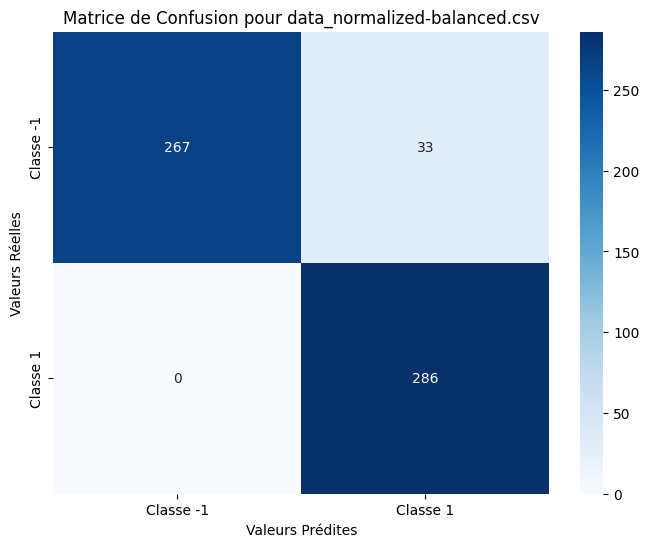

Résultats de la validation croisée pour Arbre de décision sur data_normalized-balanced.csv:
Scores pour chaque pli: [0.94368601 0.95042735 0.95384615 0.96752137 0.97094017]
Accuracy moyenne: 0.9572842099121963


Résultats de la validation simple pour Random Forest sur data_normalized-balanced.csv:
Accuracy: 1.0
Résultats de la validation croisée pour Random Forest sur data_normalized-balanced.csv:
Scores pour chaque pli: [1. 1. 1. 1. 1.]
Accuracy moyenne: 1.0


Résultats de la validation simple pour AdaBoost sur data_normalized-balanced.csv:
Accuracy: 0.8686006825938567
Résultats de la validation croisée pour AdaBoost sur data_normalized-balanced.csv:
Scores pour chaque pli: [0.86860068 0.84786325 0.88376068 0.89230769 0.85641026]
Accuracy moyenne: 0.8697885125871474


Evaluation des modèles sur : data_standardized-balanced.csv
Evaluation du modèle pour data_standardized-balanced.csv:
Matrice de confusion:
 [[267  33]
 [  0 286]]
Accuracy: 0.9436860068259386
Precision: 0.89655172413793

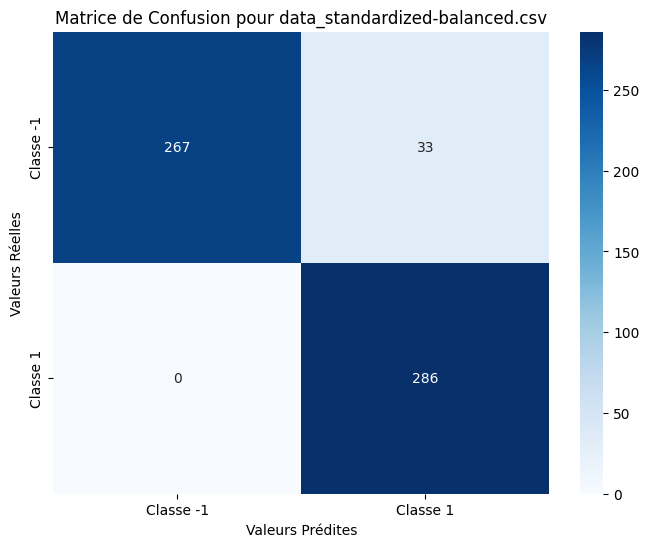

Résultats de la validation croisée pour Arbre de décision sur data_standardized-balanced.csv:
Scores pour chaque pli: [0.94368601 0.95042735 0.95384615 0.96752137 0.97094017]
Accuracy moyenne: 0.9572842099121963


Résultats de la validation simple pour Random Forest sur data_standardized-balanced.csv:
Accuracy: 1.0
Résultats de la validation croisée pour Random Forest sur data_standardized-balanced.csv:
Scores pour chaque pli: [1. 1. 1. 1. 1.]
Accuracy moyenne: 1.0


Résultats de la validation simple pour AdaBoost sur data_standardized-balanced.csv:
Accuracy: 0.8686006825938567
Résultats de la validation croisée pour AdaBoost sur data_standardized-balanced.csv:
Scores pour chaque pli: [0.86860068 0.84786325 0.88376068 0.89230769 0.85641026]
Accuracy moyenne: 0.8697885125871474




In [33]:

import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

def evaluate_model_with_cross_validation(file_path, model, model_name):
    """
    Effectue une validation croisée et affiche les scores de performance d'un modèle.

    Args:
        file_path: Chemin d'accès au fichier CSV contenant les données.
        model: Le modèle à évaluer.
        model_name: Le nom du modèle pour affichage.
    """

    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']

    # Validation croisée à 5 plis
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    print(f"Résultats de la validation croisée pour {model_name} sur {file_path}:")
    print("Scores pour chaque pli:", cv_scores)
    print("Accuracy moyenne:", cv_scores.mean())
    print("\n")


# Charger les données une fois pour toutes
file_path_pca_balanced = "uci-secom-pca-balanced.csv"
file_path_normalized_balanced = "data_normalized-balanced.csv"
file_path_standardized_balanced = "data_standardized-balanced.csv"

# Définir les modèles
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Réseau de neurones (vous devez adapter le modèle en fonction de votre structure)
neural_network_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
neural_network_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Validation simple et croisée pour chaque modèle et chaque ensemble de données
for file_path in [file_path_pca_balanced, file_path_normalized_balanced, file_path_standardized_balanced]:
    print("=" * 40)
    print(f"Evaluation des modèles sur : {file_path}")
    print("=" * 40)

    # Arbre de décision
    evaluate_decision_tree(file_path)
    evaluate_model_with_cross_validation(file_path, decision_tree_model, "Arbre de décision")

    # Random Forest
    # Evaluate Random Forest using the evaluate_model_with_cross_validation function
    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Résultats de la validation simple pour Random Forest sur {file_path}:")
    print("Accuracy:", accuracy)
    evaluate_model_with_cross_validation(file_path, random_forest_model, "Random Forest")

    # AdaBoost
    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    adaboost_model.fit(X_train, y_train)
    y_pred = adaboost_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Résultats de la validation simple pour AdaBoost sur {file_path}:")
    print("Accuracy:", accuracy)
    evaluate_model_with_cross_validation(file_path, adaboost_model, "AdaBoost")





In [34]:


import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score




def optimize_hyperparameters(file_path, model, param_grid, search_type="GridSearch"):
    """
    Optimise les hyperparamètres d'un modèle donné à l'aide de GridSearchCV ou RandomizedSearchCV.

    Args:
        file_path: Chemin d'accès au fichier CSV contenant les données.
        model: Le modèle à optimiser.
        param_grid: Dictionnaire des hyperparamètres à optimiser.
        search_type: Type de recherche à utiliser ("GridSearch" ou "RandomizedSearch").

    Returns:
        Le meilleur modèle et les meilleurs hyperparamètres trouvés.
    """

    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if search_type == "GridSearch":
        search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    elif search_type == "RandomizedSearch":
        search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    else:
        raise ValueError("Invalid search_type. Choose 'GridSearch' or 'RandomizedSearch'.")

    search.fit(X_train, y_train)

    print("Meilleurs hyperparamètres:", search.best_params_)
    print("Meilleure précision:", search.best_score_)

    return search.best_estimator_


# Exemple d'optimisation pour un modèle RandomForest
random_forest_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_random_forest_model = optimize_hyperparameters("uci-secom-pca-balanced.csv", random_forest_model, param_grid_rf)



# Vous pouvez utiliser le best_random_forest_model pour faire des prédictions avec les meilleurs hyperparamètres

#y_pred = best_random_forest_model.predict(X_test)

# Exemple d'optimisation pour un modèle AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

best_adaboost_model = optimize_hyperparameters("uci-secom-pca-balanced.csv", adaboost_model, param_grid_adaboost)



# Vous pouvez utiliser le best_adaboost_model pour faire des prédictions avec les meilleurs hyperparamètres
# y_pred = best_adaboost_model.predict(X_test)



Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Meilleure précision: 1.0
Meilleurs hyperparamètres: {'learning_rate': 1.0, 'n_estimators': 200}
Meilleure précision: 0.9384615384615385


In [35]:
y_pred = best_random_forest_model.predict(X_test)


In [36]:
# prompt: maintenant je veux tester les deux modèles random forest et adaboost avec les nouvelles parametres optimisé

import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Charger les données une fois pour toutes
file_path_pca_balanced = "uci-secom-pca-balanced.csv"
file_path_normalized_balanced = "data_normalized-balanced.csv"
file_path_standardized_balanced = "data_standardized-balanced.csv"

# Définir les modèles avec les meilleurs hyperparamètres (remplacez par vos valeurs)
best_random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
best_adaboost_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)


# Validation simple et croisée pour chaque modèle et chaque ensemble de données
for file_path in [file_path_pca_balanced, file_path_normalized_balanced, file_path_standardized_balanced]:
    print("=" * 40)
    print(f"Evaluation des modèles (avec meilleurs paramètres) sur : {file_path}")
    print("=" * 40)

    # Random Forest avec les meilleurs paramètres
    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    best_random_forest_model.fit(X_train, y_train)
    y_pred = best_random_forest_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Résultats de la validation simple pour Random Forest (meilleurs paramètres) sur {file_path}:")
    print("Accuracy:", accuracy)
    evaluate_model_with_cross_validation(file_path, best_random_forest_model, "Random Forest (Meilleurs paramètres)")


    # AdaBoost avec les meilleurs paramètres
    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    best_adaboost_model.fit(X_train, y_train)
    y_pred = best_adaboost_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Résultats de la validation simple pour AdaBoost (meilleurs paramètres) sur {file_path}:")
    print("Accuracy:", accuracy)
    evaluate_model_with_cross_validation(file_path, best_adaboost_model, "AdaBoost (Meilleurs paramètres)")



Evaluation des modèles (avec meilleurs paramètres) sur : uci-secom-pca-balanced.csv
Résultats de la validation simple pour Random Forest (meilleurs paramètres) sur uci-secom-pca-balanced.csv:
Accuracy: 1.0
Résultats de la validation croisée pour Random Forest (Meilleurs paramètres) sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [1. 1. 1. 1. 1.]
Accuracy moyenne: 1.0


Résultats de la validation simple pour AdaBoost (meilleurs paramètres) sur uci-secom-pca-balanced.csv:
Accuracy: 0.8720136518771331
Résultats de la validation croisée pour AdaBoost (Meilleurs paramètres) sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [0.87201365 0.86324786 0.86666667 0.86324786 0.87692308]
Accuracy moyenne: 0.8684198243925205


Evaluation des modèles (avec meilleurs paramètres) sur : data_normalized-balanced.csv
Résultats de la validation simple pour Random Forest (meilleurs paramètres) sur data_normalized-balanced.csv:
Accuracy: 1.0
Résultats de la validation croisée pour Random Forest 

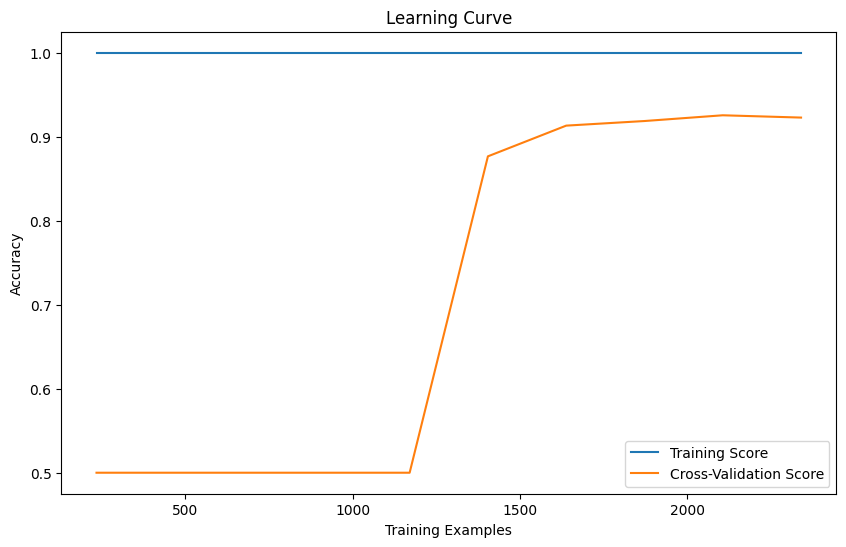

In [37]:
# prompt: il se peut que les deux modèles ont un surapprentissage ils ont mémoriser ert apprendre les donnée mais ils ont du mal a générer comment je peux vérifier

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, cross_val_score, KFold


def evaluate_decision_tree(file_path):
    """
    Effectue une validation simple et une validation croisée pour un modèle d'arbre de décision.

    Args:
        file_path: Chemin d'accès au fichier CSV contenant les données.
    """
    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Résultats de la validation simple pour l'arbre de décision sur {file_path}:")
    print("Accuracy:", accuracy)






# Charger les données
file_path = "uci-secom-pca-balanced.csv"
df = pd.read_csv(file_path)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

# Créer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeClassifier(random_state=42),  # Remplacez par votre modèle
    X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Si la différence entre les scores d'entraînement et de test est importante,
# cela peut indiquer un sur-apprentissage.


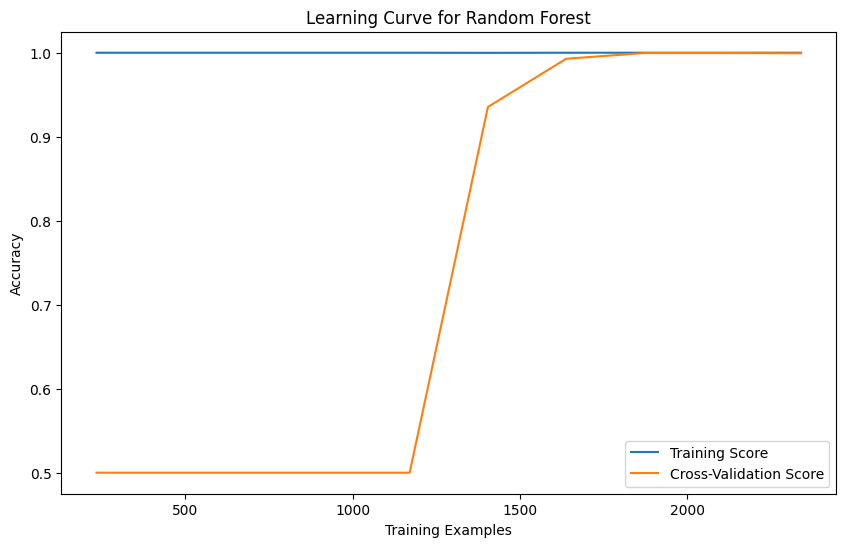

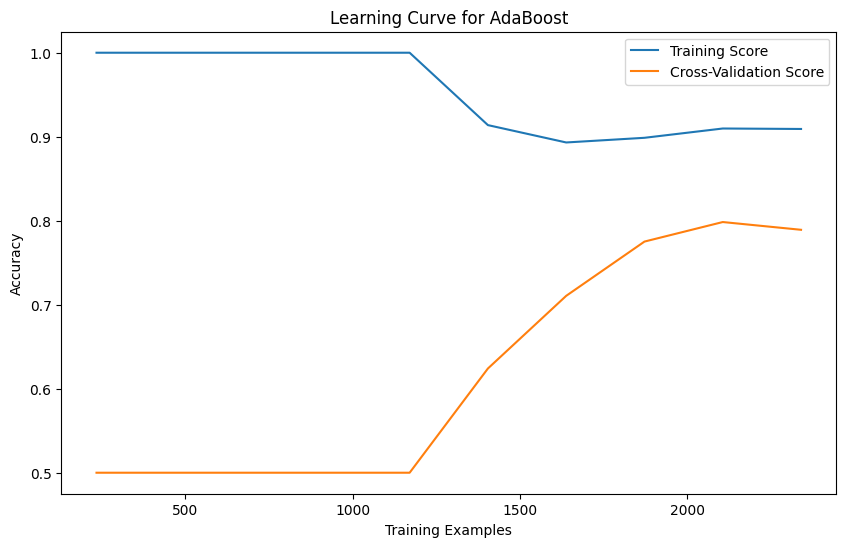

In [40]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




# Charger les données
file_path = "uci-secom-pca-balanced.csv"
df = pd.read_csv(file_path)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']


def plot_learning_curve(model, X, y, model_name):
    """
    Crée et affiche la courbe d'apprentissage pour un modèle donné.

    Args:
        model: Le modèle à évaluer.
        X: Les données d'entrée.
        y: Les données de sortie.
        model_name: Le nom du modèle pour l'affichage.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend()
    plt.show()


# Courbe d'apprentissage pour RandomForest
plot_learning_curve(best_random_forest_model, X, y, "Random Forest")

# Courbe d'apprentissage pour AdaBoost
plot_learning_curve(best_adaboost_model, X, y, "AdaBoost")




In [41]:


import pandas as pd
!pip install wandb -qqq
import wandb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
import numpy as np

# Initialiser WandB
wandb.init(project="secom-failure-prediction")

# Charger les données une fois pour toutes
file_path_pca_balanced = "uci-secom-pca-balanced.csv"
file_path_normalized_balanced = "data_normalized-balanced.csv"
file_path_standardized_balanced = "data_standardized-balanced.csv"

# Définir les modèles
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)


def evaluate_model_with_cross_validation(file_path, model, model_name):
    """
    Effectue une validation croisée et affiche les scores de performance d'un modèle.
    Enregistre également les résultats dans WandB.

    Args:
        file_path: Chemin d'accès au fichier CSV contenant les données.
        model: Le modèle à évaluer.
        model_name: Le nom du modèle pour affichage.
    """

    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']

    # Validation croisée à 5 plis
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    print(f"Résultats de la validation croisée pour {model_name} sur {file_path}:")
    print("Scores pour chaque pli:", cv_scores)
    print("Accuracy moyenne:", cv_scores.mean())
    print("\n")

    # Enregistrer les résultats dans WandB
    wandb.log({f"{model_name} - Accuracy (CV) - {file_path}": cv_scores.mean()})


# Validation simple et croisée pour chaque modèle et chaque ensemble de données
for file_path in [file_path_pca_balanced, file_path_normalized_balanced, file_path_standardized_balanced]:
    print("=" * 40)
    print(f"Evaluation des modèles sur : {file_path}")
    print("=" * 40)

    # Arbre de décision
    evaluate_decision_tree(file_path)
    evaluate_model_with_cross_validation(file_path, decision_tree_model, "Arbre de décision")

    # Random Forest
    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Résultats de la validation simple pour Random Forest sur {file_path}:")
    print("Accuracy:", accuracy)
    wandb.log({f"Random Forest - Accuracy (Simple) - {file_path}": accuracy})
    evaluate_model_with_cross_validation(file_path, random_forest_model, "Random Forest")

    # AdaBoost
    df = pd.read_csv(file_path)
    X = df.drop('Pass/Fail', axis=1)
    y = df['Pass/Fail']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    adaboost_model.fit(X_train, y_train)
    y_pred = adaboost_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Résultats de la validation simple pour AdaBoost sur {file_path}:")
    print("Accuracy:", accuracy)
    wandb.log({f"AdaBoost - Accuracy (Simple) - {file_path}": accuracy})
    evaluate_model_with_cross_validation(file_path, adaboost_model, "AdaBoost")





# Fermer la session WandB
wandb.finish()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: bouzidisafa84 (bouzidisafa84-ecole-centra) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Evaluation des modèles sur : uci-secom-pca-balanced.csv
Résultats de la validation simple pour l'arbre de décision sur uci-secom-pca-balanced.csv:
Accuracy: 0.9436860068259386
Résultats de la validation croisée pour Arbre de décision sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [0.94368601 0.95042735 0.95384615 0.96752137 0.97094017]
Accuracy moyenne: 0.9572842099121963


Résultats de la validation simple pour Random Forest sur uci-secom-pca-balanced.csv:
Accuracy: 1.0
Résultats de la validation croisée pour Random Forest sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [1. 1. 1. 1. 1.]
Accuracy moyenne: 1.0


Résultats de la validation simple pour AdaBoost sur uci-secom-pca-balanced.csv:
Accuracy: 0.8686006825938567
Résultats de la validation croisée pour AdaBoost sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [0.86860068 0.84786325 0.88376068 0.89230769 0.85641026]
Accuracy moyenne: 0.8697885125871474


Evaluation des modèles sur : data_normalized-balanced.

AdaBoost - Accuracy (CV) - data_normalized-balanced.csv,▁
AdaBoost - Accuracy (CV) - data_standardized-balanced.csv,▁
AdaBoost - Accuracy (CV) - uci-secom-pca-balanced.csv,▁
AdaBoost - Accuracy (Simple) - data_normalized-balanced.csv,▁
AdaBoost - Accuracy (Simple) - data_standardized-balanced.csv,▁
AdaBoost - Accuracy (Simple) - uci-secom-pca-balanced.csv,▁
Arbre de décision - Accuracy (CV) - data_normalized-balanced.csv,▁
Arbre de décision - Accuracy (CV) - data_standardized-balanced.csv,▁
Arbre de décision - Accuracy (CV) - uci-secom-pca-balanced.csv,▁
Random Forest - Accuracy (CV) - data_normalized-balanced.csv,▁
Random Forest - Accuracy (CV) - data_standardized-balanced.csv,▁


In [44]:
import pandas as pd
!pip install wandb -qqq
import wandb
import tempfile
import joblib


# Function to save the model to Weights & Biases
def save_model_to_wandb(model, model_name, file_path):
  """Saves the trained model to Weights & Biases Artifacts."""
  # Initialize WandB run (if not already initialized)
  wandb.init(project="secom-failure-prediction", resume=True) #resume=True allows resuming a run if one exists


  # Create an artifact
  artifact = wandb.Artifact(f"{model_name}_model", type="model")

  # Save the model to a temporary file
  with tempfile.NamedTemporaryFile(suffix=".pkl") as temp_file:
    joblib.dump(model, temp_file.name)
    artifact.add_file(temp_file.name, name=f"{model_name}_model.pkl")

  # Log the artifact to WandB
  wandb.log_artifact(artifact)




# Exemple d'utilisation :
# Une fois que vous avez entraîné un modèle (par exemple, best_random_forest_model)
# Enregistrez le modèle avec save_model_to_wandb
# save_model_to_wandb(best_random_forest_model, "RandomForest", "uci-secom-pca-balanced.csv")


# Example for Random Forest
df = pd.read_csv(file_path_pca_balanced)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_random_forest_model.fit(X_train, y_train)
y_pred = best_random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Enregistrez le modèle RandomForest dans Weights & Biases
save_model_to_wandb(best_random_forest_model, "RandomForest", file_path_pca_balanced)

print(f"Résultats de la validation simple pour Random Forest sur {file_path_pca_balanced}:")
print("Accuracy:", accuracy)
wandb.log({f"Random Forest - Accuracy (Simple) - {file_path_pca_balanced}": accuracy})
evaluate_model_with_cross_validation(file_path_pca_balanced, best_random_forest_model, "Random Forest")

# Example for AdaBoost
df = pd.read_csv(file_path_pca_balanced)
X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_adaboost_model.fit(X_train, y_train)
y_pred = best_adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Enregistrez le modèle AdaBoost dans Weights & Biases
save_model_to_wandb(best_adaboost_model, "AdaBoost", file_path_pca_balanced)

print(f"Résultats de la validation simple pour AdaBoost sur {file_path_pca_balanced}:")
print("Accuracy:", accuracy)
wandb.log({f"AdaBoost - Accuracy (Simple) - {file_path_pca_balanced}": accuracy})
evaluate_model_with_cross_validation(file_path_pca_balanced, best_adaboost_model, "AdaBoost")



# Fermer la session WandB
wandb.finish()


Résultats de la validation simple pour Random Forest sur uci-secom-pca-balanced.csv:
Accuracy: 1.0
Résultats de la validation croisée pour Random Forest sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [1. 1. 1. 1. 1.]
Accuracy moyenne: 1.0


Résultats de la validation simple pour AdaBoost sur uci-secom-pca-balanced.csv:
Accuracy: 0.8720136518771331
Résultats de la validation croisée pour AdaBoost sur uci-secom-pca-balanced.csv:
Scores pour chaque pli: [0.87201365 0.86324786 0.86666667 0.86324786 0.87692308]
Accuracy moyenne: 0.8684198243925205




AdaBoost - Accuracy (CV) - uci-secom-pca-balanced.csv,▁
AdaBoost - Accuracy (Simple) - uci-secom-pca-balanced.csv,▁
Random Forest - Accuracy (CV) - uci-secom-pca-balanced.csv,▁
Random Forest - Accuracy (Simple) - uci-secom-pca-balanced.csv,▁
AdaBoost - Accuracy (CV) - uci-secom-pca-balanced.csv,0.86842
AdaBoost - Accuracy (Simple) - uci-secom-pca-balanced.csv,0.87201
Random Forest - Accuracy (CV) - uci-secom-pca-balanced.csv,1
Random Forest - Accuracy (Simple) - uci-secom-pca-balanced.csv,1
